In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
%matplotlib inline

In [2]:
#get the dataset from the csv file into df
df = pd.read_csv('/mnt/learning/last_project/fetch_data_stock/input/clean_apple.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10626 entries, 0 to 10625
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10626 non-null  object 
 1   Open           10626 non-null  float64
 2   High           10626 non-null  float64
 3   Low            10626 non-null  float64
 4   Close          10626 non-null  float64
 5   Volume         10626 non-null  int64  
 6   NATR_3         10626 non-null  float64
 7   RSI_3          10626 non-null  float64
 8   ADX_3          10626 non-null  float64
 9   CCI_3_0.015    10626 non-null  float64
 10  ROC_3          10626 non-null  float64
 11  STOCHk_14_3_3  10626 non-null  float64
 12  STOCHd_14_3_3  10626 non-null  float64
 13  WILLR_3        10626 non-null  float64
 14  OBV            10626 non-null  float64
 15  MACD_12_26_9   10626 non-null  float64
 16  BBL_3_2.0      10626 non-null  float64
 17  BBM_3_2.0      10626 non-null  float64
 18  BBU_3_

In [3]:
#rename the column in df

df = df.rename(columns={'Volume': 'volume',
                        'Open': 'open', 'High': 'high',
                        'Low': 'low', 'Close': 'close', 'Date':'date'})

df.head(2)

,date,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
0,1981-05-06 00:00:00-04:00,0.095254,0.095254,0.094821,0.094821,18950400,1.732413,13.797179,34.412223,-100.000000,...,0.096697,0.099374,5.536127,0.149543,0.094821,0.098285,0.095038,0.094897,0.096726,0.096123
1,1981-05-07 00:00:00-04:00,0.096120,0.096553,0.096120,0.096120,9363200,1.755353,41.587538,28.006879,0.000723,...,0.096120,0.098241,4.413220,0.500002,0.094821,0.097852,0.096337,0.095970,0.096691,0.095838


In [4]:
#Change the type of the date column from object to datetime in df

df['date'] = pd.to_datetime(df['date'], utc=True)
df["date"] = df["date"].dt.strftime("%Y-%m-%d")
df.index = pd.DatetimeIndex(df["date"]) #assign the changed column to the index
df.sort_index(inplace=True)
df.last('3D')

,date,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
date,,,,,,,,,,,,,,,,,,,,,
2023-07-05,2023-07-05,191.570007,192.979996,190.619995,191.330002,46920300,1.347648,54.661777,68.426905,-100.000000,...,192.586670,194.749651,2.246241,0.209505,190.619995,194.479996,191.799995,191.357489,190.156675,192.610507
2023-07-06,2023-07-06,189.839996,192.020004,189.199997,191.809998,45094300,1.407242,60.249293,50.174234,-84.587180,...,191.866669,192.792788,0.965378,0.469404,189.199997,193.880005,190.610001,191.716240,190.783743,192.579596
2023-07-07,2023-07-07,191.410004,192.669998,190.240005,190.679993,46778000,1.344982,41.979730,36.480167,-24.074109,...,191.273331,192.199450,0.968373,0.179664,189.199997,192.979996,191.455002,190.704180,191.312508,191.867859


In [5]:
#drop column date if it exists in df

if 'date' in df.columns:
    df.drop(['date'], axis=1, inplace=True)

#check for null values in df
df.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
NATR_3           0
RSI_3            0
ADX_3            0
CCI_3_0.015      0
ROC_3            0
STOCHk_14_3_3    0
STOCHd_14_3_3    0
WILLR_3          0
OBV              0
MACD_12_26_9     0
BBL_3_2.0        0
BBM_3_2.0        0
BBU_3_2.0        0
BBB_3_2.0        0
BBP_3_2.0        0
min_price_3      0
max_price_3      0
mid_price        0
tema_2           0
tema_100         0
tema_8           0
dtype: int64

In [6]:
df['volume'] = df['volume'].astype(float)

In [7]:
###get the dataset of apple stock from 2013-01-01 to 2023-06-01 from df
df = df.loc['2013-01-01':'2023-06-29']
df.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2023-06-15', '2023-06-16', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27',
               '2023-06-28', '2023-06-29'],
              dtype='datetime64[ns]', name='date', length=2641, freq=None)

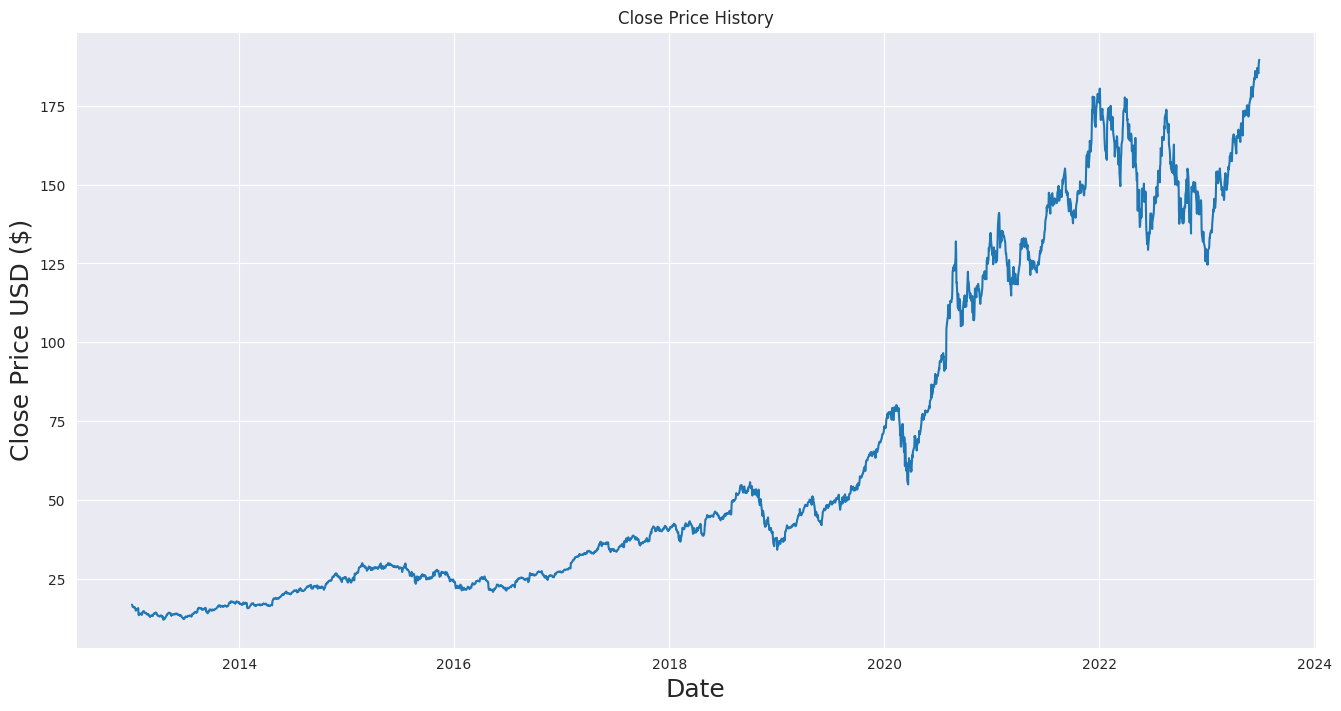

In [8]:
###plot the close price history of AAPL stock from 2013-01-01 to 2023-06-01 from df using matplotlib

plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2641 entries, 2013-01-02 to 2023-06-29
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           2641 non-null   float64
 1   high           2641 non-null   float64
 2   low            2641 non-null   float64
 3   close          2641 non-null   float64
 4   volume         2641 non-null   float64
 5   NATR_3         2641 non-null   float64
 6   RSI_3          2641 non-null   float64
 7   ADX_3          2641 non-null   float64
 8   CCI_3_0.015    2641 non-null   float64
 9   ROC_3          2641 non-null   float64
 10  STOCHk_14_3_3  2641 non-null   float64
 11  STOCHd_14_3_3  2641 non-null   float64
 12  WILLR_3        2641 non-null   float64
 13  OBV            2641 non-null   float64
 14  MACD_12_26_9   2641 non-null   float64
 15  BBL_3_2.0      2641 non-null   float64
 16  BBM_3_2.0      2641 non-null   float64
 17  BBU_3_2.0      2641 non-null   flo

In [10]:
#We need to restructure the data set by adding a target column ‘Actual’, which will the stock prices for the next day.

steps=-1
main_dataset = df.copy()
main_dataset['Next date'] = main_dataset['close'].shift(steps)
main_dataset.last('3D')

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8,Next date
date,,,,,,,,,,,,,,,,,,,,,
2023-06-27,185.889999,188.389999,185.669998,188.059998,50730800.0,1.568914,73.595133,54.561645,100.000000,0.566844,...,188.948062,2.440739,0.805084,185.009995,188.389999,187.029999,187.899925,186.632078,187.278902,189.250000
2023-06-28,187.929993,189.899994,187.600006,189.250000,51216800.0,1.387183,80.211459,63.784642,100.000000,1.376691,...,190.862702,3.557931,0.758291,185.229996,189.899994,188.750000,189.282870,187.286402,188.519037,189.589996
2023-06-29,189.080002,190.070007,188.940002,189.589996,46347300.0,0.990360,82.130415,70.421457,74.977544,2.331728,...,190.278593,1.388529,0.737563,185.669998,190.070007,189.505005,189.651317,187.927439,189.377760,NaN


In [11]:
main_dataset.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
NATR_3           0
RSI_3            0
ADX_3            0
CCI_3_0.015      0
ROC_3            0
STOCHk_14_3_3    0
STOCHd_14_3_3    0
WILLR_3          0
OBV              0
MACD_12_26_9     0
BBL_3_2.0        0
BBM_3_2.0        0
BBU_3_2.0        0
BBB_3_2.0        0
BBP_3_2.0        0
min_price_3      0
max_price_3      0
mid_price        0
tema_2           0
tema_100         0
tema_8           0
Next date        1
dtype: int64

In [12]:
##dropping columns with null values in dataset_for_prediction

main_dataset.dropna(inplace=True)
main_dataset.last('3D')

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8,Next date
date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,186.830002,188.050003,185.229996,185.270004,48088700.0,1.501054,44.690576,50.819182,5.509362,0.712110,...,187.819752,1.613475,0.151829,183.669998,188.050003,186.639999,185.347501,186.015535,186.181094,188.059998
2023-06-27,185.889999,188.389999,185.669998,188.059998,50730800.0,1.568914,73.595133,54.561645,100.000000,0.566844,...,188.948062,2.440739,0.805084,185.009995,188.389999,187.029999,187.899925,186.632078,187.278902,189.250000
2023-06-28,187.929993,189.899994,187.600006,189.250000,51216800.0,1.387183,80.211459,63.784642,100.000000,1.376691,...,190.862702,3.557931,0.758291,185.229996,189.899994,188.750000,189.282870,187.286402,188.519037,189.589996


Text(0.5, 1.0, ' Apple Stock Value')

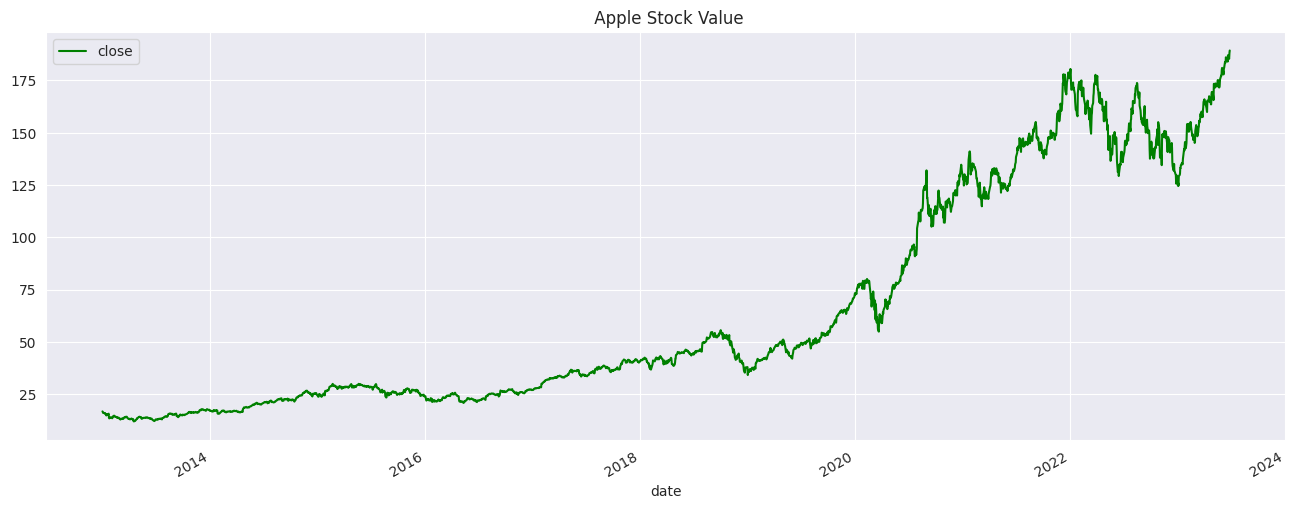

In [13]:
#plot the mean stock prices for the current dataset and lock the trends from df

main_dataset['close'].plot(color='green', figsize=(16, 6))
plt.legend(['close'])
plt.title(" Apple Stock Value")

Text(0.5, 1.0, ' Apple Stock Volume')

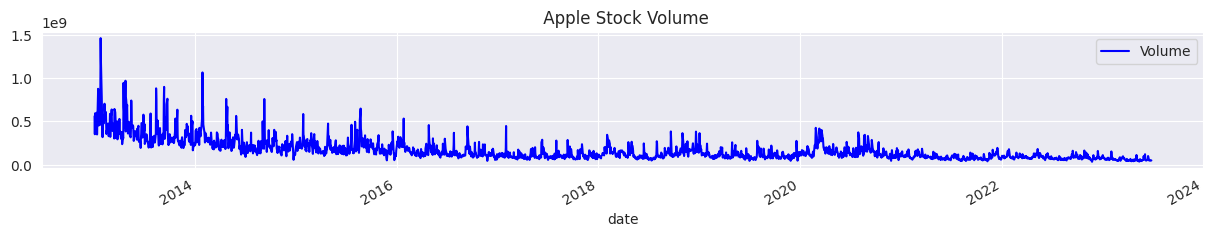

In [14]:
#Plotting volume of Apple stocks sold daily from df

main_dataset['volume'].plot(color='blue', figsize=(15, 2))
plt.legend(['Volume'])
plt.title(" Apple Stock Volume")

In [15]:
test_close = main_dataset[['close']]
test_close.head(4)

,close
date,
2013-01-02,16.813856
2013-01-03,16.601631
2013-01-04,16.139193
2013-01-07,16.044268


In [16]:
test_actual = main_dataset[['close',
                            'Next date']]
test_actual.tail(10)

,close,Next date
date,,
2023-06-14,183.949997,186.009995
2023-06-15,186.009995,184.919998
2023-06-16,184.919998,185.009995
2023-06-20,185.009995,183.960007
2023-06-21,183.960007,187.000000
2023-06-22,187.000000,186.679993
2023-06-23,186.679993,185.270004
2023-06-26,185.270004,188.059998
2023-06-27,188.059998,189.250000


In [17]:
#Normalizing the input and target features
#Since the stock prices and volume are on a different scale, we need to normalize the data. We use StandardScaler to normalize the data. The scaler is fit on the training set and then applied to the test set. This means we need to fit the scaler on the training set and apply the same scaler to the test set.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(main_dataset[['low', 'high', 'open', 'close', 'volume',
                                                 'NATR_3', 'RSI_3', 'ADX_3', 'CCI_3_0.015',
                                                 'ROC_3','STOCHk_14_3_3', 'STOCHd_14_3_3',
                                                 'WILLR_3','OBV', 'MACD_12_26_9', 'BBL_3_2.0',
                                                 'BBM_3_2.0','BBU_3_2.0', 'BBB_3_2.0',
                                                 'BBP_3_2.0', 'min_price_3', 'max_price_3',
                                                 'mid_price', 'tema_2', 'tema_100','tema_8']])
# scaled_data = scaler.fit_transform(main_dataset[["close", 'Next date']])
scaled_data = pd.DataFrame(scaled_data)

X = scaled_data
X.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2637,2.335733,2.306341,2.326136,2.292514,-0.951636,-0.653227,-0.429931,-0.122700,-0.059021,0.128350,...,2.316260,2.270260,-0.706670,-1.423373,2.349982,2.271282,2.320960,2.293995,2.317515,2.309677
2638,2.344233,2.312753,2.308186,2.345726,-0.930374,-0.593012,0.682324,0.090882,1.111916,0.080036,...,2.323006,2.291342,-0.429942,1.048766,2.376195,2.277628,2.328404,2.342676,2.329313,2.330613
2639,2.381518,2.341228,2.347141,2.368422,-0.926463,-0.754270,0.936922,0.617237,1.111916,0.349385,...,2.339363,2.327116,-0.056231,0.871686,2.380499,2.305811,2.361232,2.369053,2.341835,2.354264


In [18]:
#Scaling the target feature
scaler_target = StandardScaler()
scaled_target = scaler_target.fit_transform(main_dataset[['Next date']])
scaled_target = pd.DataFrame(scaled_target)

Y = scaled_target
Y.tail(3)

,0
2637,2.342354
2638,2.365030
2639,2.371509


In [19]:
#rename X

X.rename(columns={0:'open', 1:'high', 2:'low', 3:'close', 4:'volume', 5:'NATR_3', 6:'RSI_3', 7:'ADX_3', 8:'CCI_3_0.015',
                  9:'ROC_3', 10:'STOCHk_14_3_3', 11:'STOCHd_14_3_3', 12:'WILLR_3',13:'OBV', 14:'MACD_12_26_9',
                  15:'BBL_3_2.0', 16:'BBM_3_2.0', 17:'BBU_3_2.0', 18:'BBB_3_2.0', 19:'BBP_3_2.0', 20:'min_price_3',
                  21:'max_price_3', 22:'mid_price', 23:'tema_2', 24:'tema_100',25:'tema_8'}, inplace=True)
X.index=main_dataset.index
X.tail(3)

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,2.335733,2.306341,2.326136,2.292514,-0.951636,-0.653227,-0.429931,-0.122700,-0.059021,0.128350,...,2.316260,2.270260,-0.706670,-1.423373,2.349982,2.271282,2.320960,2.293995,2.317515,2.309677
2023-06-27,2.344233,2.312753,2.308186,2.345726,-0.930374,-0.593012,0.682324,0.090882,1.111916,0.080036,...,2.323006,2.291342,-0.429942,1.048766,2.376195,2.277628,2.328404,2.342676,2.329313,2.330613
2023-06-28,2.381518,2.341228,2.347141,2.368422,-0.926463,-0.754270,0.936922,0.617237,1.111916,0.349385,...,2.339363,2.327116,-0.056231,0.871686,2.380499,2.305811,2.361232,2.369053,2.341835,2.354264


In [21]:
#rename Y

Y.rename(columns={0:'Next date'}, inplace=True)
Y.index=main_dataset.index
Y.head(3)

,Next date
date,
2013-01-02,-0.924814
2013-01-03,-0.933626
2013-01-04,-0.935435


In [22]:
#Get the dataset for validation from df
df_for_validation = X.loc['2023-01-01':'2023-06-28']
df_for_validation.tail(3)

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,2.335733,2.306341,2.326136,2.292514,-0.951636,-0.653227,-0.429931,-0.122700,-0.059021,0.128350,...,2.316260,2.270260,-0.706670,-1.423373,2.349982,2.271282,2.320960,2.293995,2.317515,2.309677
2023-06-27,2.344233,2.312753,2.308186,2.345726,-0.930374,-0.593012,0.682324,0.090882,1.111916,0.080036,...,2.323006,2.291342,-0.429942,1.048766,2.376195,2.277628,2.328404,2.342676,2.329313,2.330613
2023-06-28,2.381518,2.341228,2.347141,2.368422,-0.926463,-0.754270,0.936922,0.617237,1.111916,0.349385,...,2.339363,2.327116,-0.056231,0.871686,2.380499,2.305811,2.361232,2.369053,2.341835,2.354264


In [23]:
df_for_validation_actual = Y.loc['2023-01-01':'2023-06-28']
df_for_validation_actual.head(2)

,Next date
date,
2023-01-03,1.159659
2023-01-04,1.134199


In [24]:
#Get the train from X between 2013-01-01 and 2022-12-31

X = X.loc['2013-01-01':'2022-12-31']
X.last('3D')

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
date,,,,,,,,,,,,,,,,,,,,,
2022-12-28,1.181917,1.223882,1.227442,1.155873,-0.651074,1.040302,-1.808987,-0.049065,-1.366503,-1.665436,...,1.220643,1.260560,1.267992,-1.378935,1.212117,1.225795,1.203205,1.157328,1.380633,1.179409
2022-12-29,1.217745,1.213540,1.195454,1.223764,-0.729411,1.005763,-0.366413,0.352776,0.132838,-0.676015,...,1.206364,1.222748,0.616763,0.449149,1.212117,1.206998,1.215670,1.218169,1.367635,1.187815
2022-12-30,1.211966,1.203575,1.203451,1.229849,-0.718705,0.367113,-0.258215,0.671126,0.389822,-0.134072,...,1.205730,1.221123,0.589184,0.647220,1.212117,1.199926,1.207772,1.231403,1.355567,1.199335


In [25]:
Y = Y.loc['2013-01-01':'2022-12-31']
Y.last('3D')

,Next date
date,
2022-12-28,1.221408
2022-12-29,1.227488
2022-12-30,1.135149


In [26]:
#Splitting the dataset into training and testing sets

temp_df = main_dataset.loc['2013-01-01':'2022-12-31']

train_size = int(len(temp_df) * 0.80)
test_size = int(len(temp_df) - train_size)
print(test_size)

504


In [27]:
#Splitting the dataset into training and testing sets using train_size and test_size from df and y respectively
train_X, train_Y = X[:train_size].dropna(), Y[:train_size].dropna()
test_X, test_Y = X[train_size:].dropna(), Y[train_size:].dropna()

In [28]:
test_X.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_0.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_2', 'tema_100', 'tema_8'],
      dtype='object')

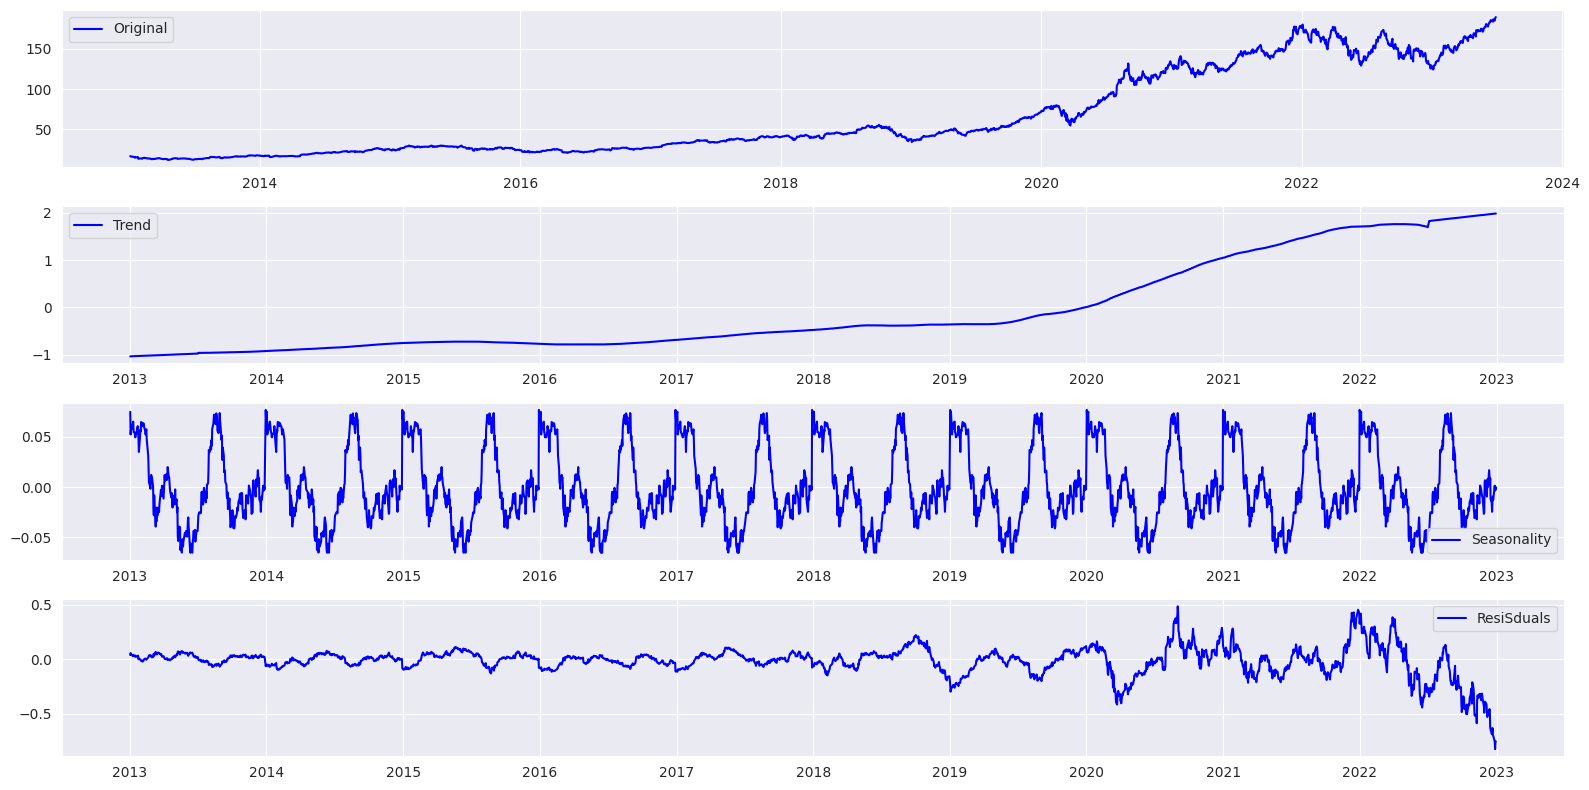

In [58]:
from statsmodels.tsa.stattools import acf
# ###Understanding the Time series data
# Decomposing Time Series into several components-Trend, Seasonality, and Random noise
#
# We know that Time series data is composed of Level, Trend, Seasonality, and Random noise. Let’s decompose the data and plot the trend, seasonality, and randomness in the data.
#
# We use statsmodel for seasonal decompose as an additive model and the frequency of the time series, which is the periodicity of the data, which is 365 days for yearly data.
#
# Additive model = Trend + Seasonality + Random Noise

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(X['close'], model='add', period=252, extrapolate_trend='freq', two_sided=True, filt=None)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(16, 8))
plt.subplot(411)
plt.plot(df['close'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='ResiSduals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [30]:
###Check for Data Stationarity using Augmented Dickey-Fuller(ADF) test.

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def test_adf(series, title=''):
    dfout={}
    dftest = sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)


In [31]:
#Checking for stationary in the data using the ADF test

y_test = Y['Next date'][:train_size].dropna()
test_adf(y_test, 'Next date')

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Next date


In [32]:
#Make the data stationary by differencing the data
y_test_diff = y_test.diff().dropna()
test_adf(y_test_diff, 'Stock Price Next Day')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary Stock Price Next Day


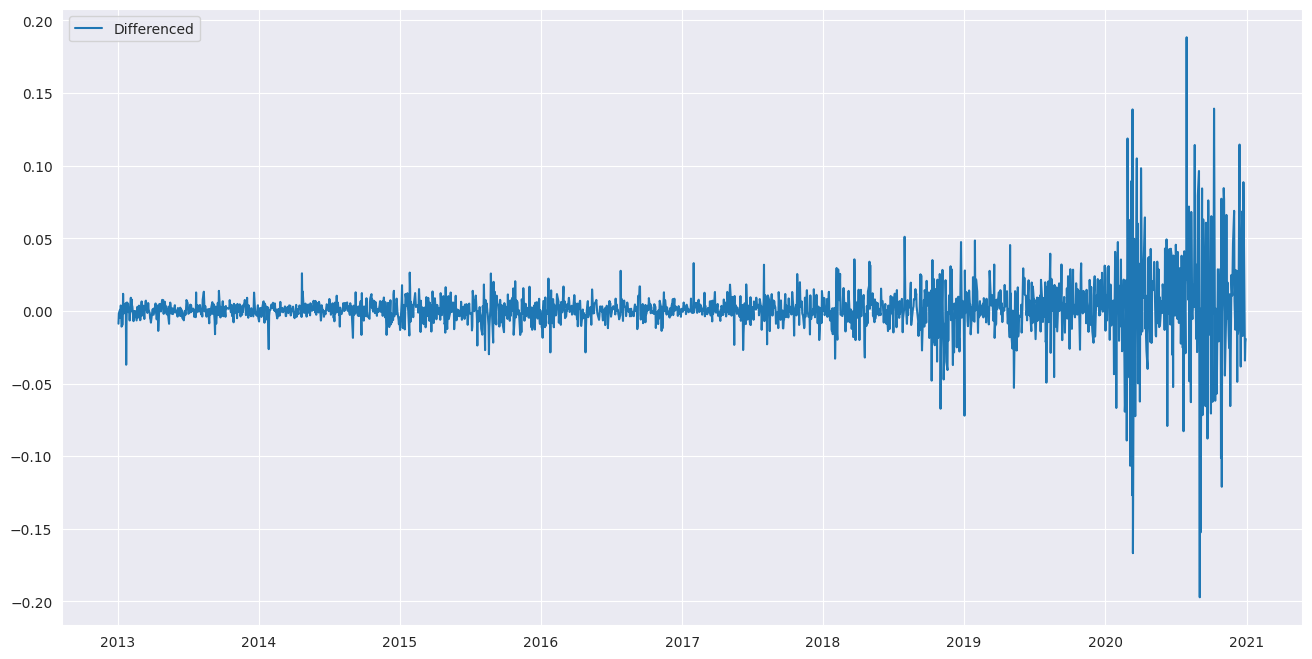

In [33]:
#Plotting the differenced data

plt.figure(figsize=(16, 8))
plt.plot(y_test_diff, label='Differenced')
plt.legend(loc='best')
plt.show()

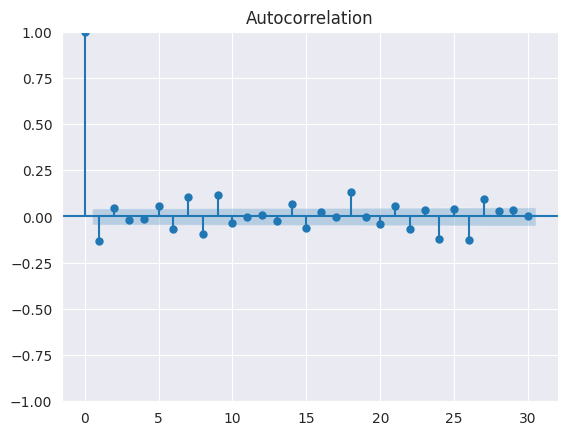

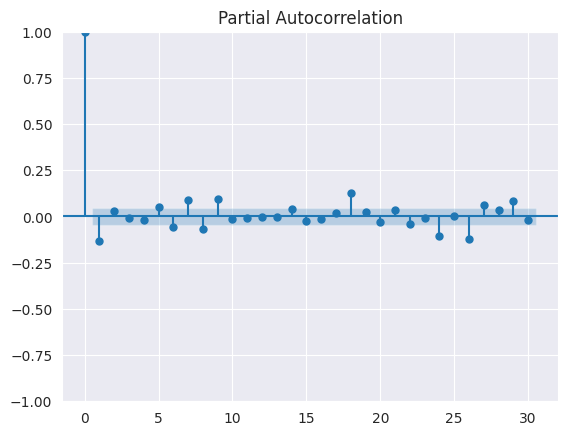

In [34]:
#Plotting the autocorrelation plot for the differenced data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y_test_diff, lags=30)
plot_pacf(y_test_diff, lags=30)
plt.show()

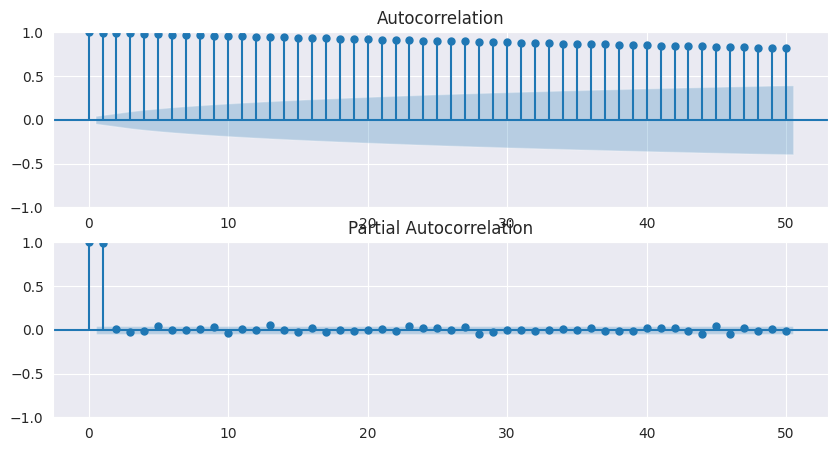

In [35]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [36]:
#Get only tema_2 from train_X, test_X

train_X_with_tema_2 = train_X.drop(['tema_8', 'tema_100'], axis=1)
text_X_with_tema_2 = test_X.drop(['tema_8' , 'tema_100'], axis=1)

train_X_with_tema_2.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_0.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_2'],
      dtype='object')

In [37]:
#Get only tema_8 from train_X, test_X

train_X_with_tema_8 = train_X.drop(['tema_2', 'tema_100'], axis=1)
text_X_with_tema_8 = test_X.drop(['tema_2', 'tema_100'], axis=1)

train_X_with_tema_8.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_0.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_8'],
      dtype='object')

In [38]:
#Get only tema_100 from train_X, test_X

train_X_with_tema_100 = train_X.drop(['tema_2', 'tema_8'], axis=1)
text_X_with_tema_100 = test_X.drop(['tema_2', 'tema_8'], axis=1)

train_X_with_tema_100.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_0.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_100'],
      dtype='object')

In [39]:
#Get df without tema from train_X, test_X

train_X_without_tema = train_X.drop(['tema_2', 'tema_8', 'tema_100'], axis=1)
text_X_without_tema = test_X.drop(['tema_2', 'tema_8', 'tema_100'], axis=1)

text_X_without_tema.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_0.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price'],
      dtype='object')

In [81]:
#Get the best parameters of seasonal orders for the SAIRMAX model using the auto_arima function from pmdarima library.

from pmdarima.arima import auto_arima

stepwise_model = auto_arima(train_Y, exogenous=train_X_with_tema_2 , start_p=1, start_q=1,
                            max_p=7, max_q=7, m=12,
                            start_P=0, seasonal=True,
                            d=1, max_d=7,D =1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-8718.626, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-9157.039, Time=0.91 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-8744.979, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-9557.088, Time=2.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-9531.889, Time=1.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-9556.206, Time=4.71 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-9556.395, Time=4.46 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-9555.725, Time=2.57 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=-9554.068, Time=7.95 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=-9555.210, Time=16.32 sec

Best model:  ARIMA(1,1,0)(

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2014
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4782.544
Date:                            Wed, 12 Jul 2023   AIC                          -9557.088
Time:                                    13:57:25   BIC                          -9534.683
Sample:                                         0   HQIC                         -9548.862
                                           - 2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1167      0.009    -12.480      0.000      -0.135      -0.098
ar.S.L12      -0.6271      0.009    -66.535      0.000      -0.646      -0.609
ar.S.L24      -0.4355      0.008    -52.056      0.000      -0.452      -0.419
sigma2         0.0005   5.26e-06     93.019      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             36340.04
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              24.20   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
#set the order and seasonal order for all project

#Average Mean Absolute Percentage Error:  9.007967559508627 (tema_2), 9.494701458098493 (tema_8), 10.553632591175544 (tema_100)
# order = (1, 1, 1)
# seasonal_order = (2, 1, 0, 12)

#Average Mean Absolute Percentage Error:  8.929140381017902(tema_2), 9.432941139268372 (tema_8), tema_100
order = (1, 1, 0)
seasonal_order = (2, 1, 0, 12)

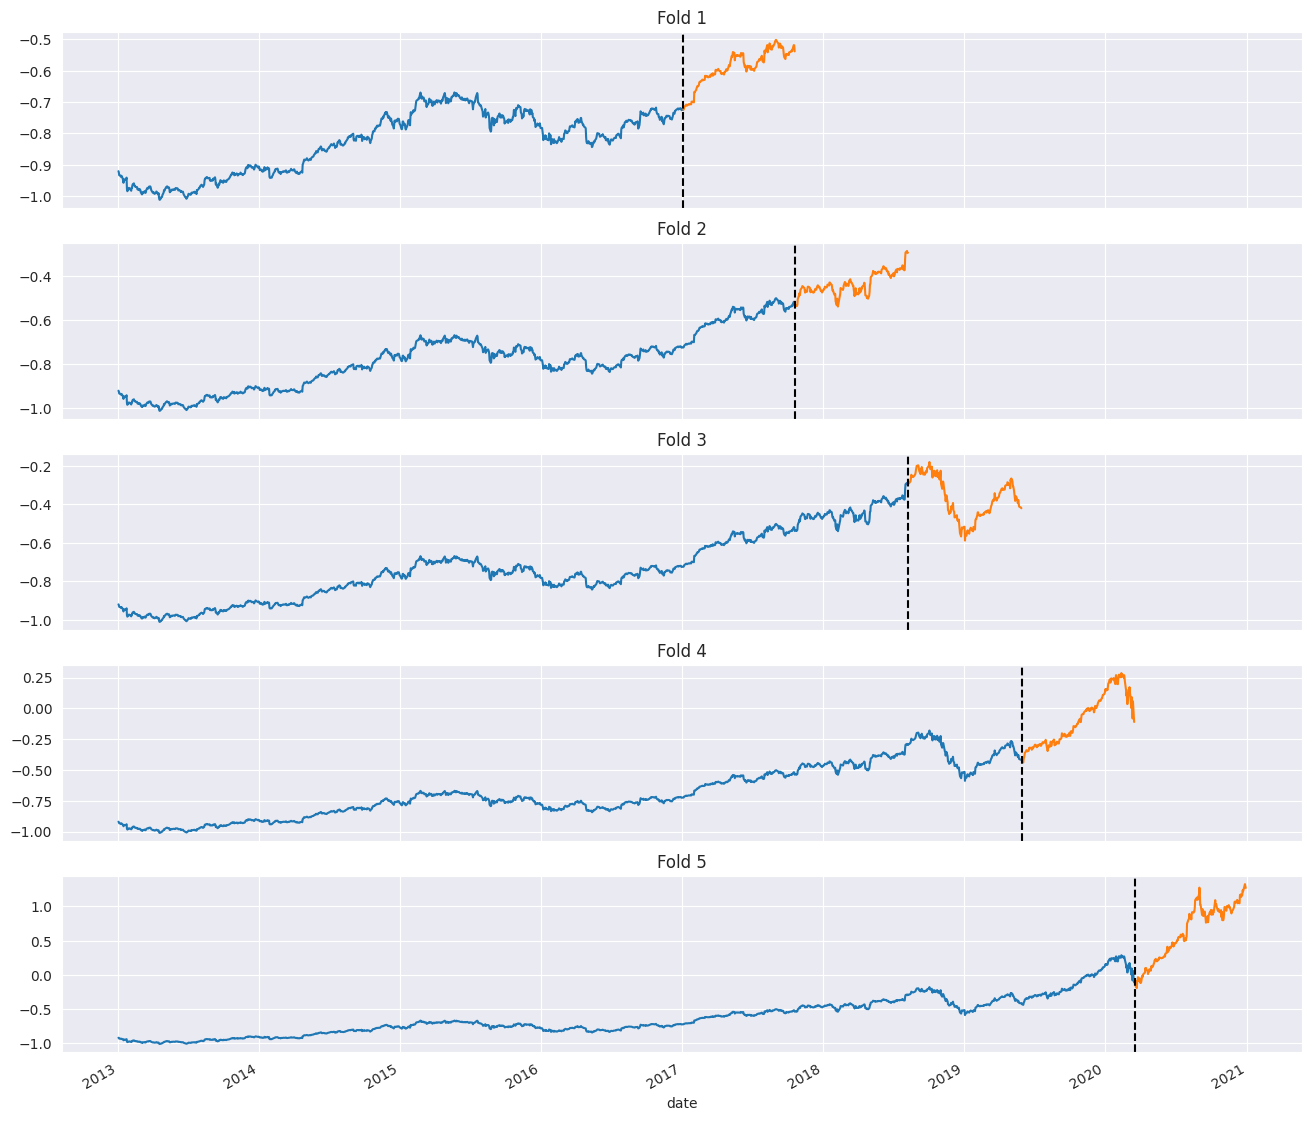

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.446850
         Iterations: 6
         Function evaluations: 1531


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


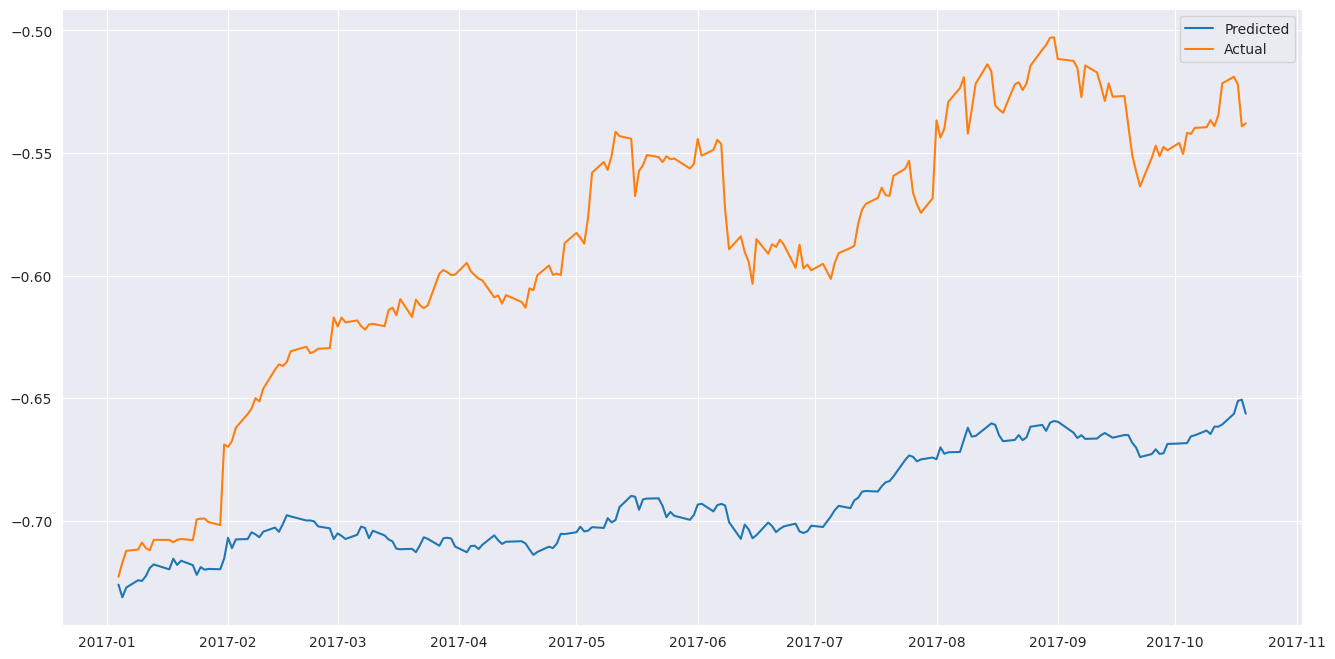

Mean Absolute Percentage Error:  0.18741133005539778


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.428971
         Iterations: 7
         Function evaluations: 1768


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


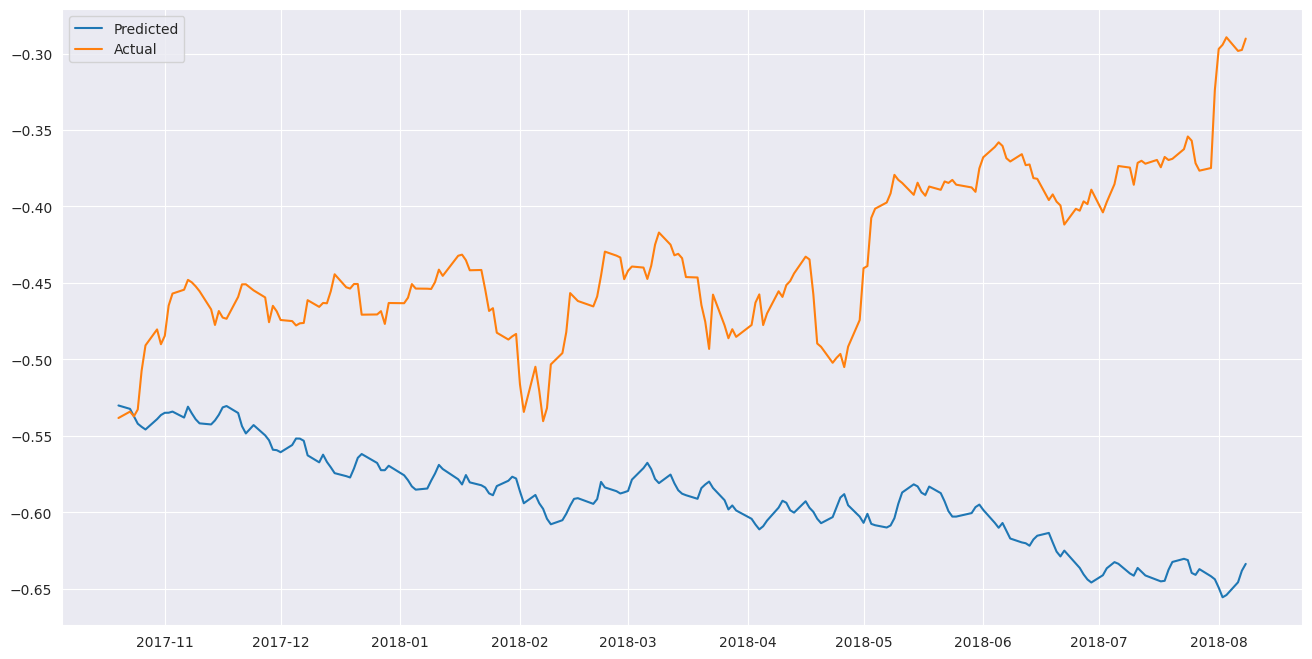

Mean Absolute Percentage Error:  0.3862413895396502


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.328189
         Iterations: 5
         Function evaluations: 1294


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


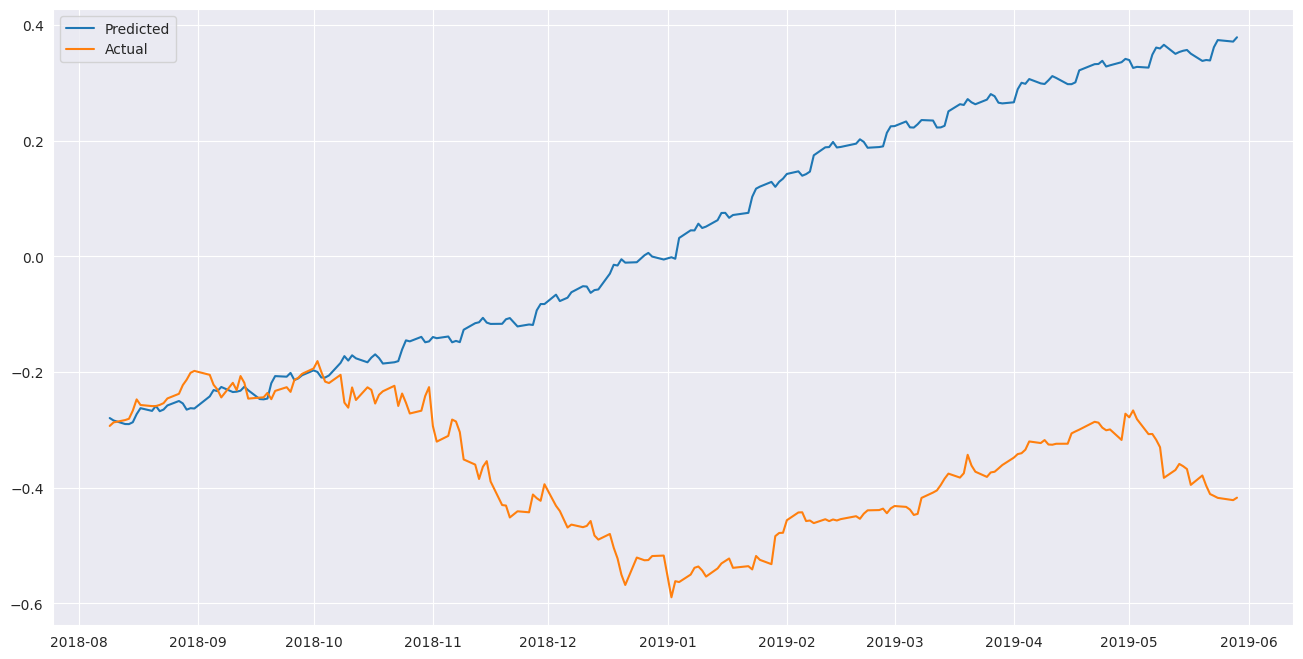

Mean Absolute Percentage Error:  1.0297053080676335


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.087134
         Iterations: 4
         Function evaluations: 1005


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


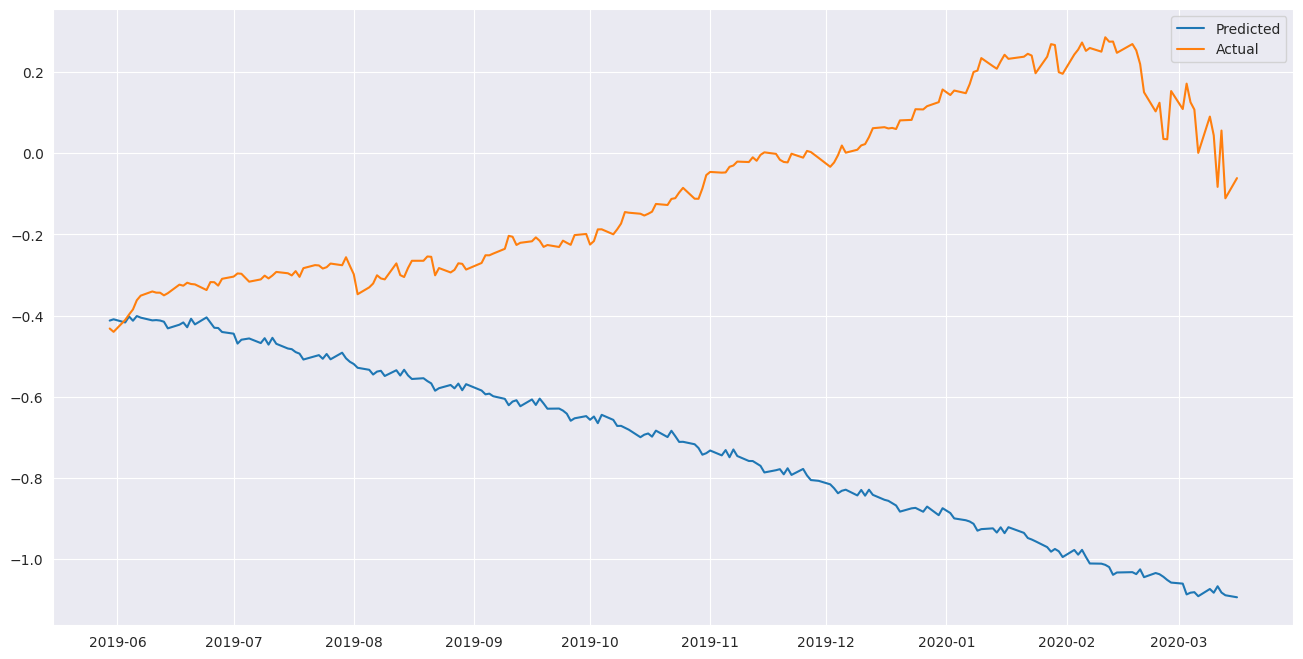

Mean Absolute Percentage Error:  37.02564780134318


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.849909
         Iterations: 6
         Function evaluations: 1501


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


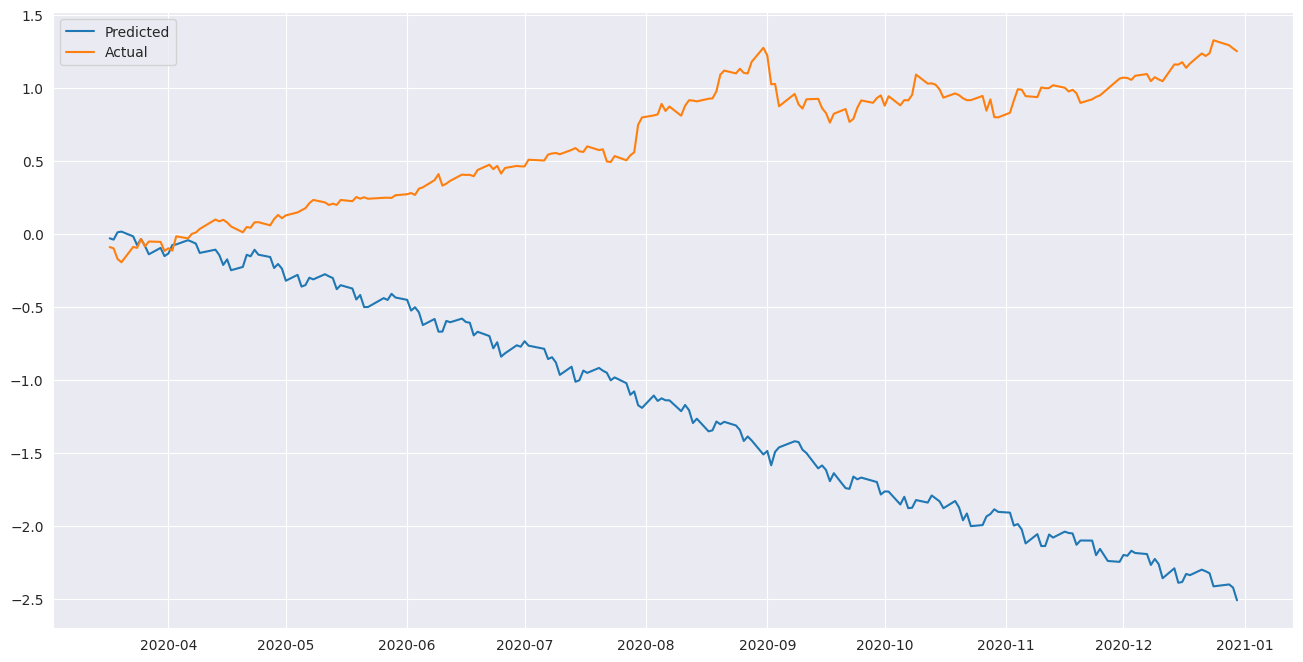

Mean Absolute Percentage Error:  6.016696076083646
Average Mean Absolute Percentage Error:  8.929140381017902


In [105]:
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

##using tema_2

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_samples = len(train_X_with_tema_2)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)
tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)

train_X_with_tema_2 = train_X_with_tema_2.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(5, 1 , figsize=(16, 15), sharex=True)
fold = 0
the_average_mape = 0

for train_index, test_index in tscv.split(train_X_with_tema_2):
    X_train, X_test = train_X_with_tema_2.iloc[train_index], train_X_with_tema_2.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    X_train["close"].plot(ax=ax[fold], label='Training Set', title='Fold {}'.format(fold+1))
    X_test["close"].plot(ax=ax[fold], label='Test Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()

for train_index, test_index in tscv.split(train_X_with_tema_2):
    X_train, X_test = train_X_with_tema_2.iloc[train_index], train_X_with_tema_2.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_invertibility=True, enforce_stationarity=True)

    model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
    y_pred = model_fit.predict(start=test_index[0], end=test_index[-1], exog=X_test)

    ##plot the predicted and actual values from y_pred and x_test
    y_pred.reset_index(drop=True, inplace=True)
    y_pred.index=X_test.index

    plt.figure(figsize=(16, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.legend(loc='best')
    plt.show()

    mape = mean_absolute_percentage_error(y_test, y_pred)
    the_average_mape = the_average_mape + mape
    print("Mean Absolute Percentage Error: ", mape)

print("Average Mean Absolute Percentage Error: ", the_average_mape/5)

In [106]:
#Predicting the values in the validation data using the SARIMAX model
model = SARIMAX(endog=train_Y, exog=train_X_with_tema_2, order=order, seasonal_order=seasonal_order, enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
print(model_fit.summary())

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.373571
         Iterations: 4
         Function evaluations: 952
                                     SARIMAX Results                                      
Dep. Variable:                          Next date   No. Observations:                 2014
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4780.372
Date:                            Wed, 12 Jul 2023   AIC                          -9504.745
Time:                                    15:37:44   BIC                          -9348.257
Sample:                                         0   HQIC                         -9447.251
                                           - 2014                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [107]:
#Predicting the values in the validation data using the SARIMAX model
df_for_validation_with_tema_2 = df_for_validation.drop(['tema_8', 'tema_100'], axis=1)
forecast = model_fit.forecast(steps=len(df_for_validation_with_tema_2), exog=df_for_validation_with_tema_2)

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [108]:
#Plotting the forecasted values

forecast_apple= pd.DataFrame(forecast)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=df_for_validation_actual.index
forecast_apple["Actual"] =df_for_validation_actual
forecast_apple.rename(columns={0:"predicted_close"}, inplace=True)

<Axes: xlabel='date'>

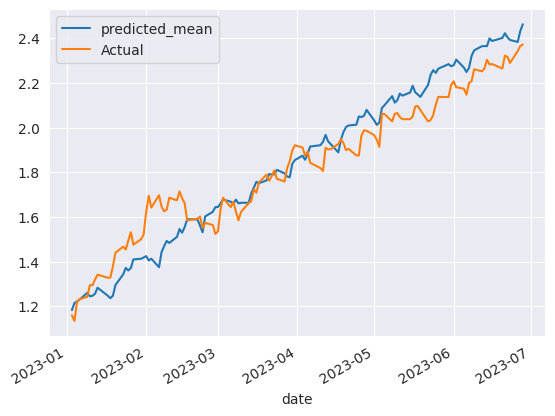

In [109]:
forecast_apple["predicted_mean"].plot(legend=True)
forecast_apple["Actual"].plot(legend=True)

In [110]:
from statsmodels.tools.eval_measures import rmse
error=rmse(forecast_apple["predicted_mean"], forecast_apple["Actual"])
error

0.10385622852235807

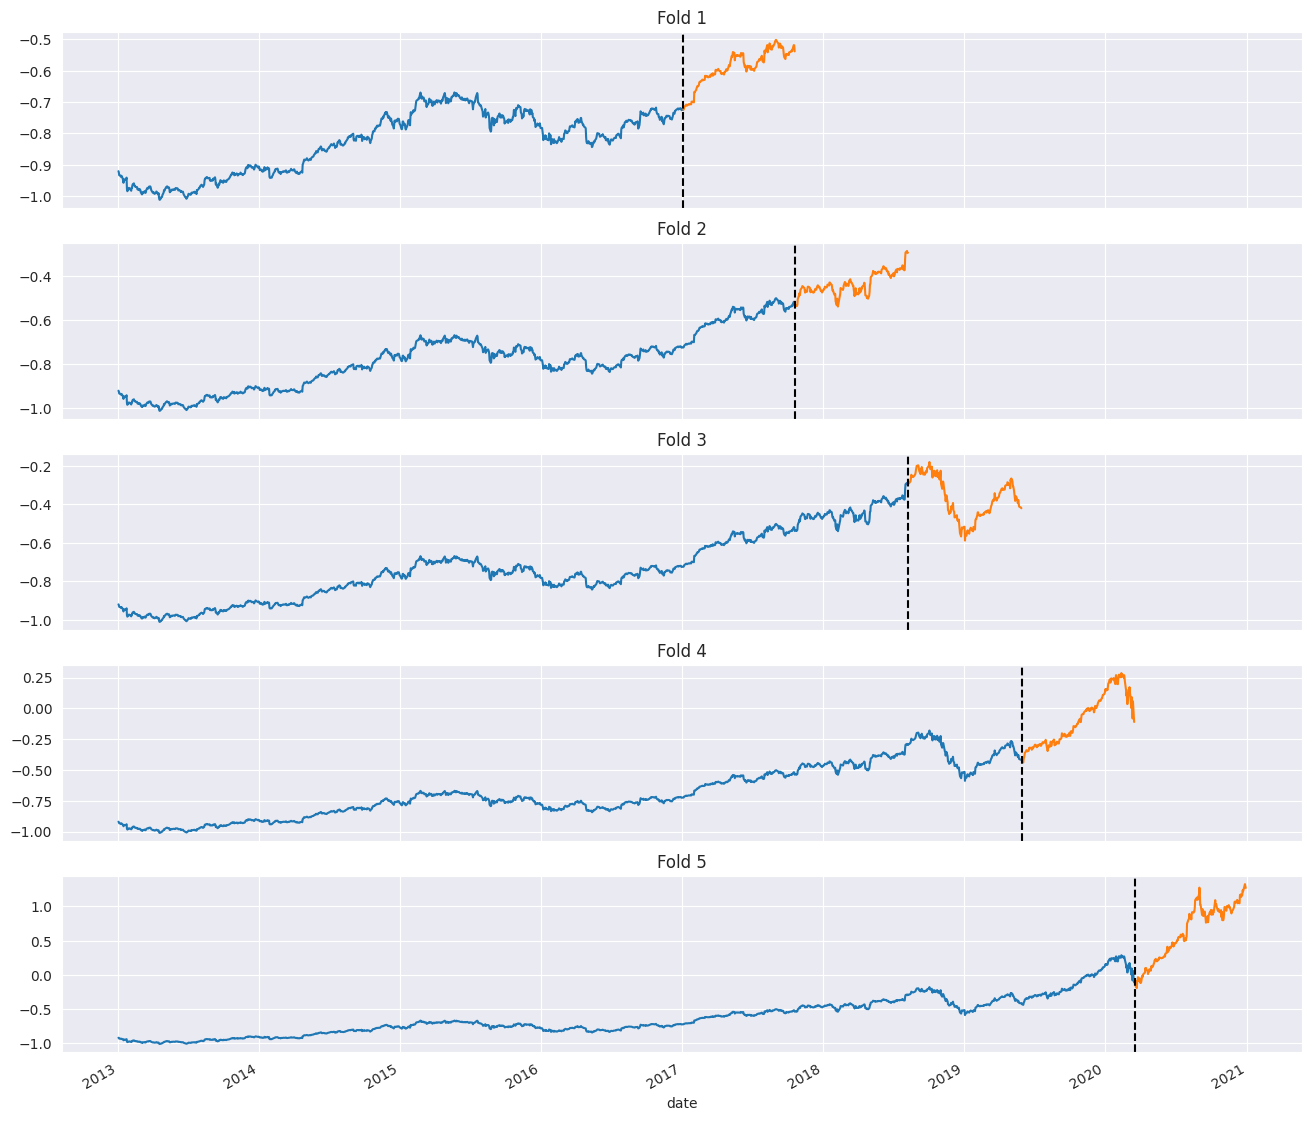

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.447771
         Iterations: 6
         Function evaluations: 1501


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


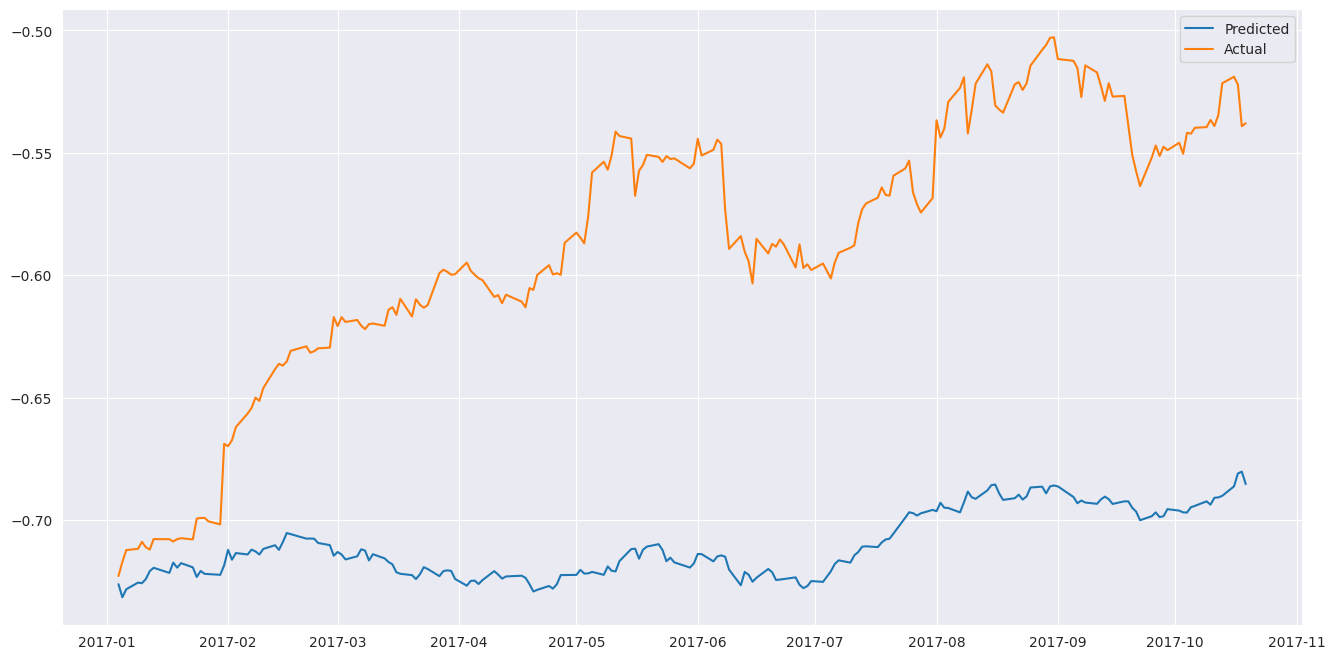

Mean Absolute Percentage Error:  0.2188994574853449


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.428916
         Iterations: 6
         Function evaluations: 1512


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


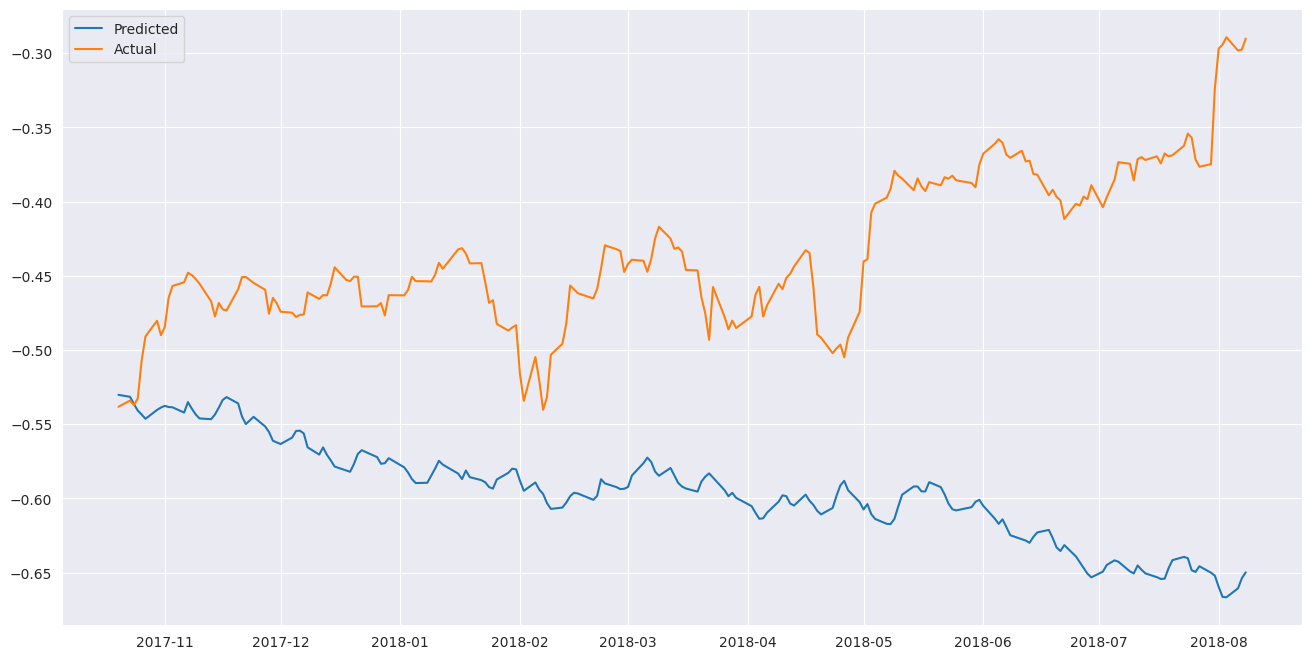

Mean Absolute Percentage Error:  0.398828894756091


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.325902
         Iterations: 5
         Function evaluations: 1296


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


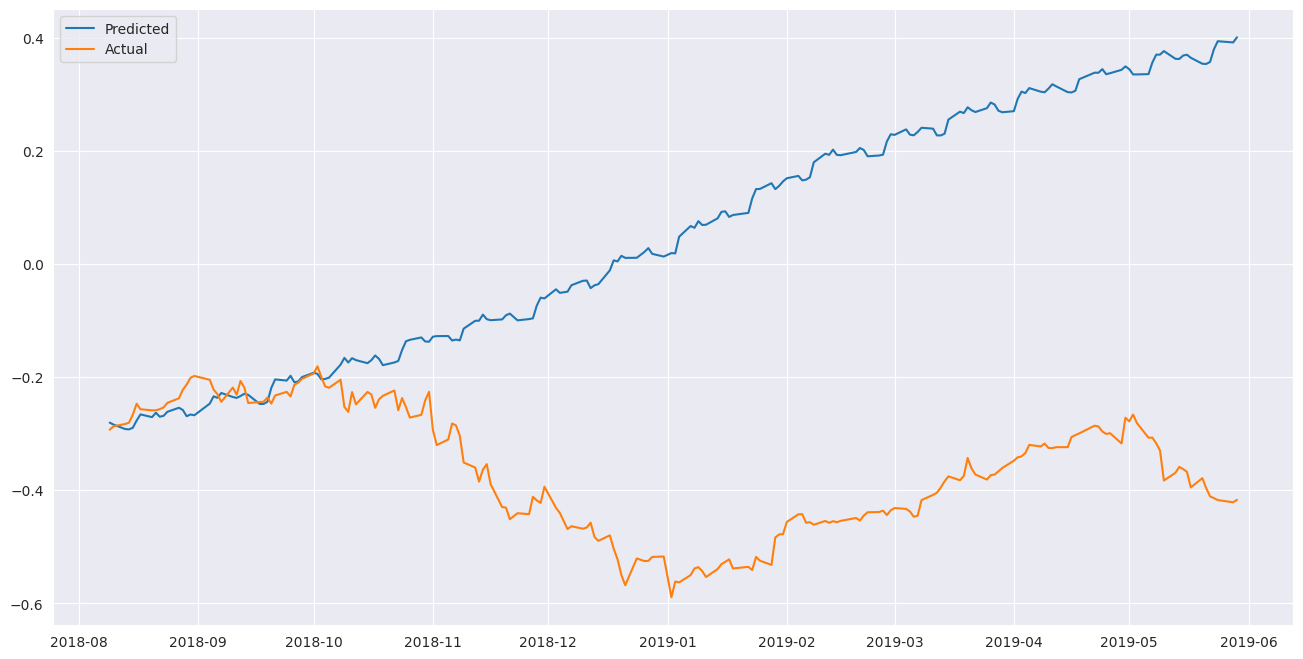

Mean Absolute Percentage Error:  1.0539025827402724


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.085656
         Iterations: 4
         Function evaluations: 1003


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


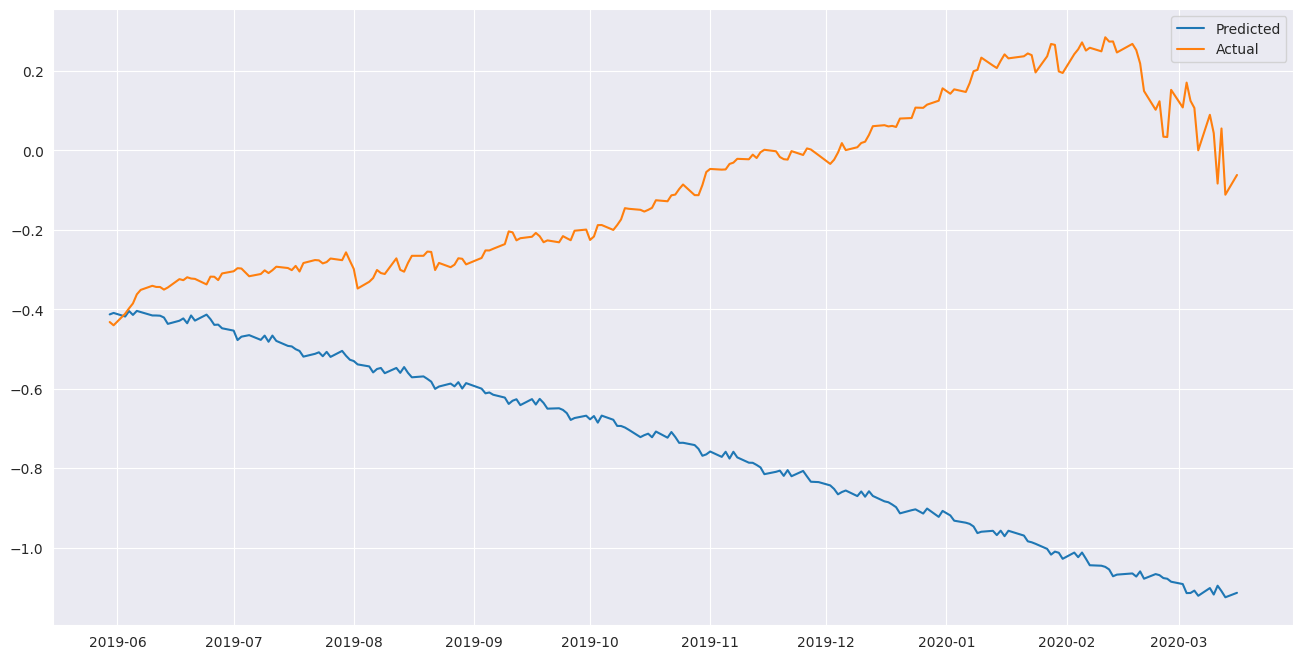

Mean Absolute Percentage Error:  38.212425621464


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.849679
         Iterations: 6
         Function evaluations: 1553


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


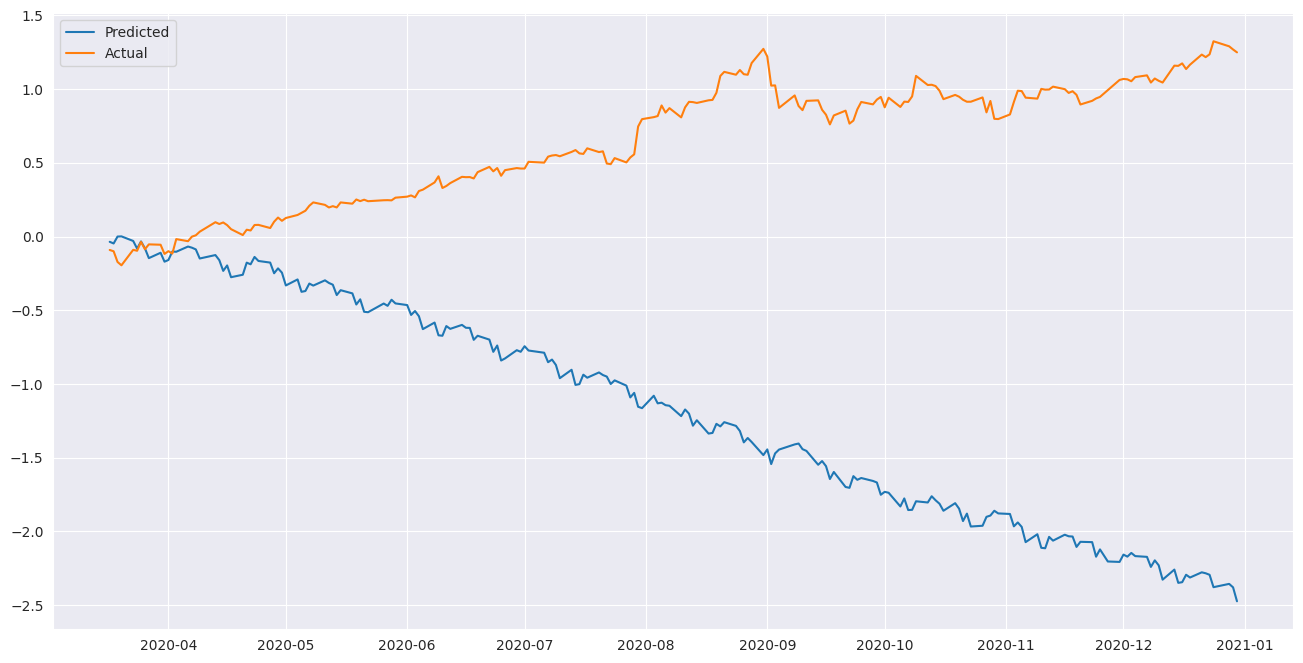

Mean Absolute Percentage Error:  7.280649139896154
Average Mean Absolute Percentage Error:  9.432941139268372


In [111]:
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

##using tema_8

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_samples = len(train_X_with_tema_8)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)
tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)

train_X_with_tema_8 = train_X_with_tema_8.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(5, 1 , figsize=(16, 15), sharex=True)
fold = 0
the_average_mape = 0

for train_index, test_index in tscv.split(train_X_with_tema_8):
    X_train, X_test = train_X_with_tema_8.iloc[train_index], train_X_with_tema_8.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    X_train["close"].plot(ax=ax[fold], label='Training Set', title='Fold {}'.format(fold+1))
    X_test["close"].plot(ax=ax[fold], label='Test Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()

for train_index, test_index in tscv.split(train_X_with_tema_8):
    X_train, X_test = train_X_with_tema_8.iloc[train_index], train_X_with_tema_8.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_invertibility=True, enforce_stationarity=True)

    model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
    y_pred = model_fit.predict(start=test_index[0], end=test_index[-1], exog=X_test)

    ##plot the predicted and actual values from y_pred and x_test
    y_pred.reset_index(drop=True, inplace=True)
    y_pred.index=X_test.index

    plt.figure(figsize=(16, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.legend(loc='best')
    plt.show()

    mape = mean_absolute_percentage_error(y_test, y_pred)
    the_average_mape = the_average_mape + mape
    print("Mean Absolute Percentage Error: ", mape)

print("Average Mean Absolute Percentage Error: ", the_average_mape/5)

In [112]:
#Predicting the values in the validation data using the SARIMAX model
model = SARIMAX(endog=train_Y, exog=train_X_with_tema_8, order=order, seasonal_order=seasonal_order,
                enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
print(model_fit.summary())

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.373113
         Iterations: 6
         Function evaluations: 1482
                                     SARIMAX Results                                      
Dep. Variable:                          Next date   No. Observations:                 2014
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4779.450
Date:                            Wed, 12 Jul 2023   AIC                          -9502.899
Time:                                    16:21:08   BIC                          -9346.412
Sample:                                         0   HQIC                         -9445.405
                                           - 2014                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [113]:
#Predicting the values in the validation data using the SARIMAX model
df_for_validation_with_tema_8 = df_for_validation.drop(['tema_2', 'tema_100'], axis=1)
forecast = model_fit.forecast(steps=len(df_for_validation_with_tema_8), exog=df_for_validation_with_tema_8)

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='date'>

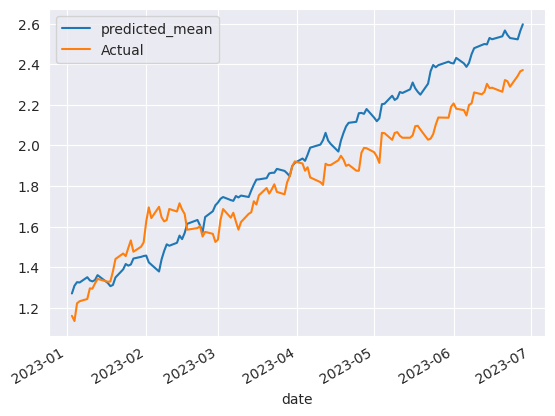

In [114]:
#Plotting the forecasted values

forecast_apple = pd.DataFrame(forecast)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index = df_for_validation_actual.index
forecast_apple["Actual"] = df_for_validation_actual
forecast_apple.rename(columns={0: "predicted_close"}, inplace=True)
forecast_apple["predicted_mean"].plot(legend=True)
forecast_apple["Actual"].plot(legend=True)

In [115]:
from statsmodels.tools.eval_measures import rmse

error = rmse(forecast_apple["predicted_mean"], forecast_apple["Actual"])
error

0.16898086938631315

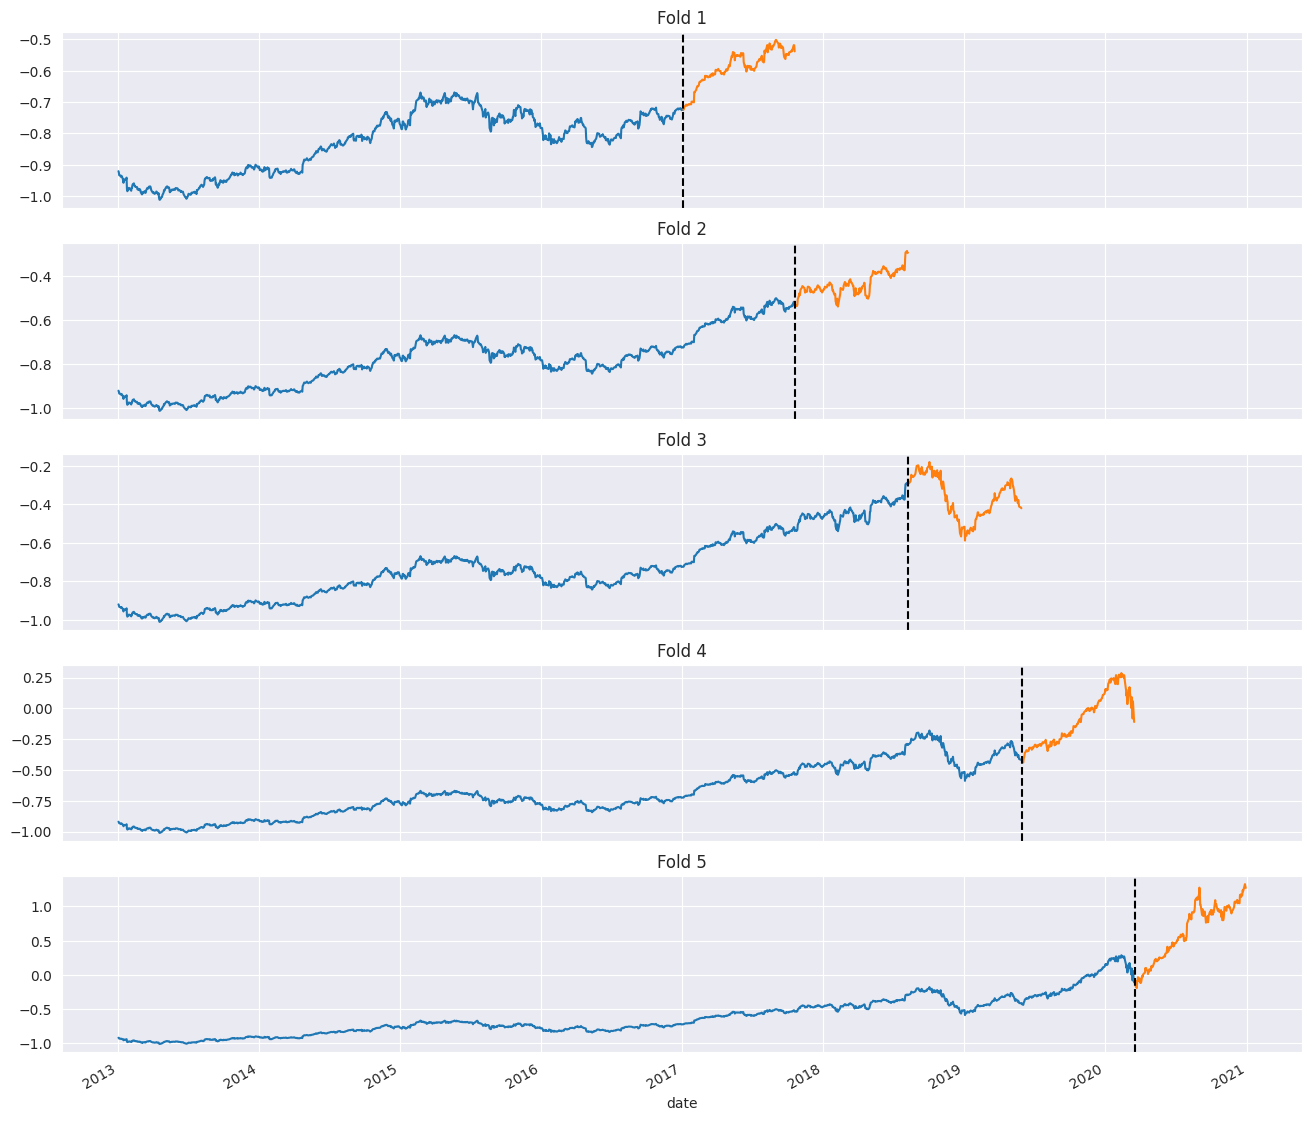

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.444754
         Iterations: 5
         Function evaluations: 1263


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


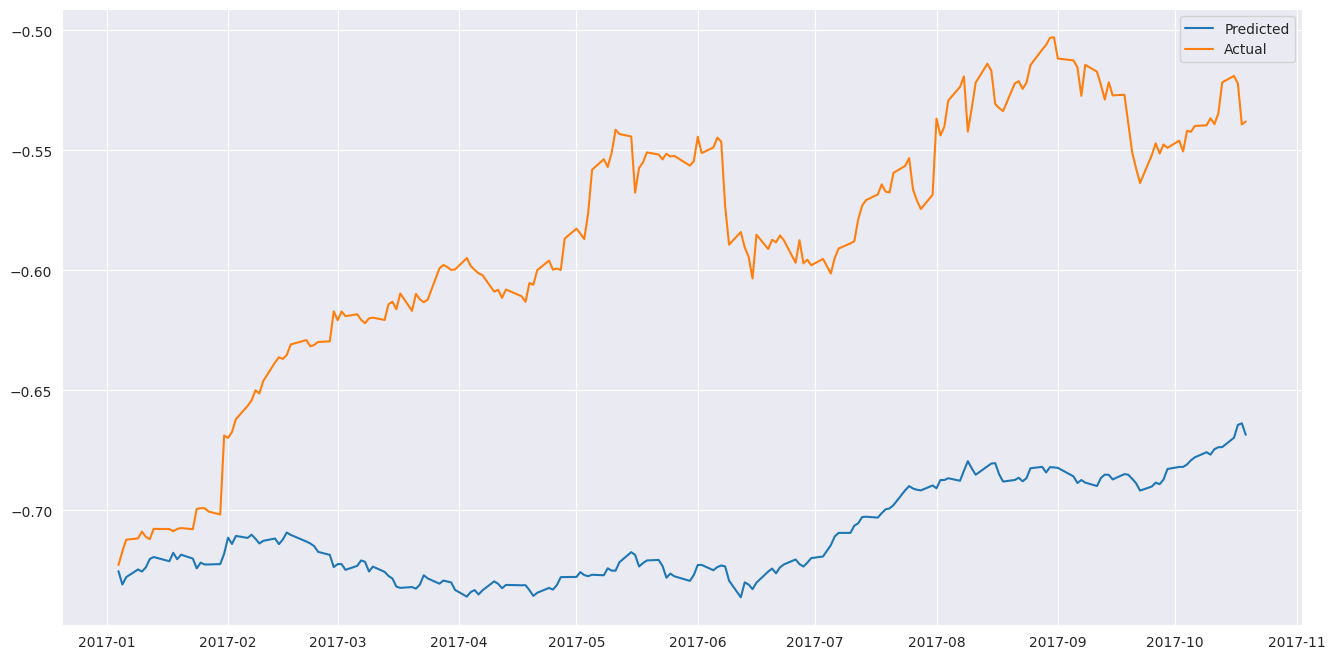

Mean Absolute Percentage Error:  0.21857730338220044


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.428556
         Iterations: 5
         Function evaluations: 1259


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


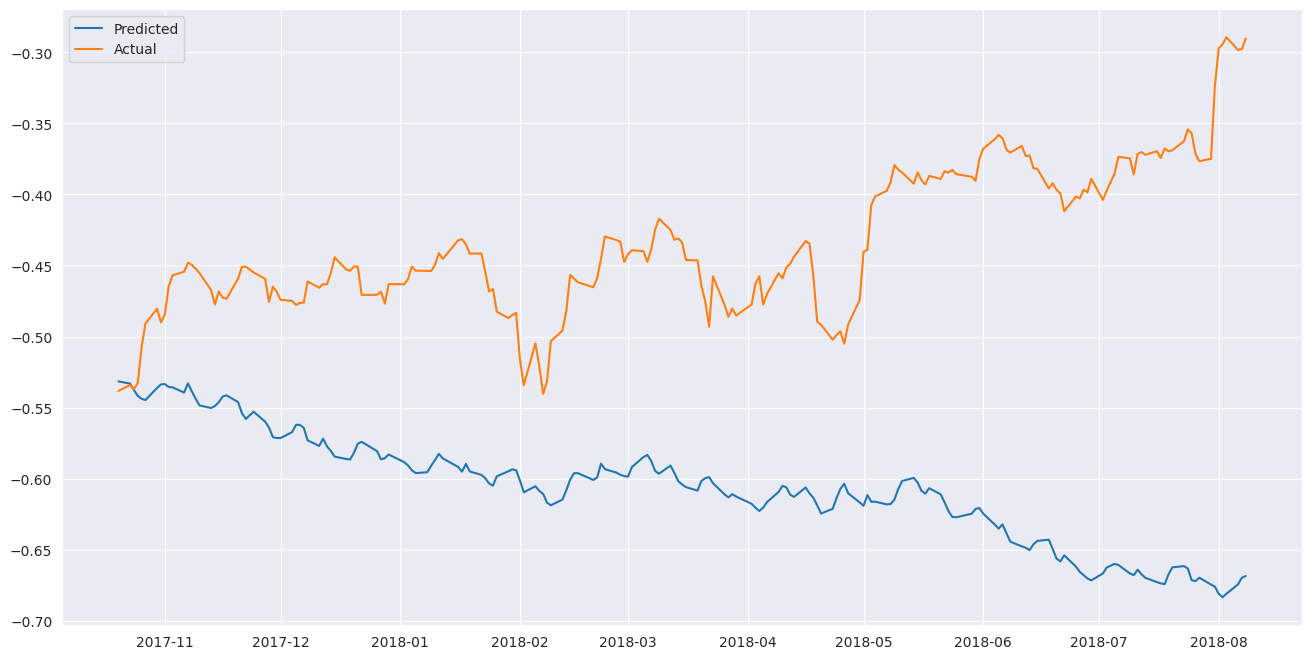

Mean Absolute Percentage Error:  0.42618665223969476


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.331470
         Iterations: 6
         Function evaluations: 1511


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


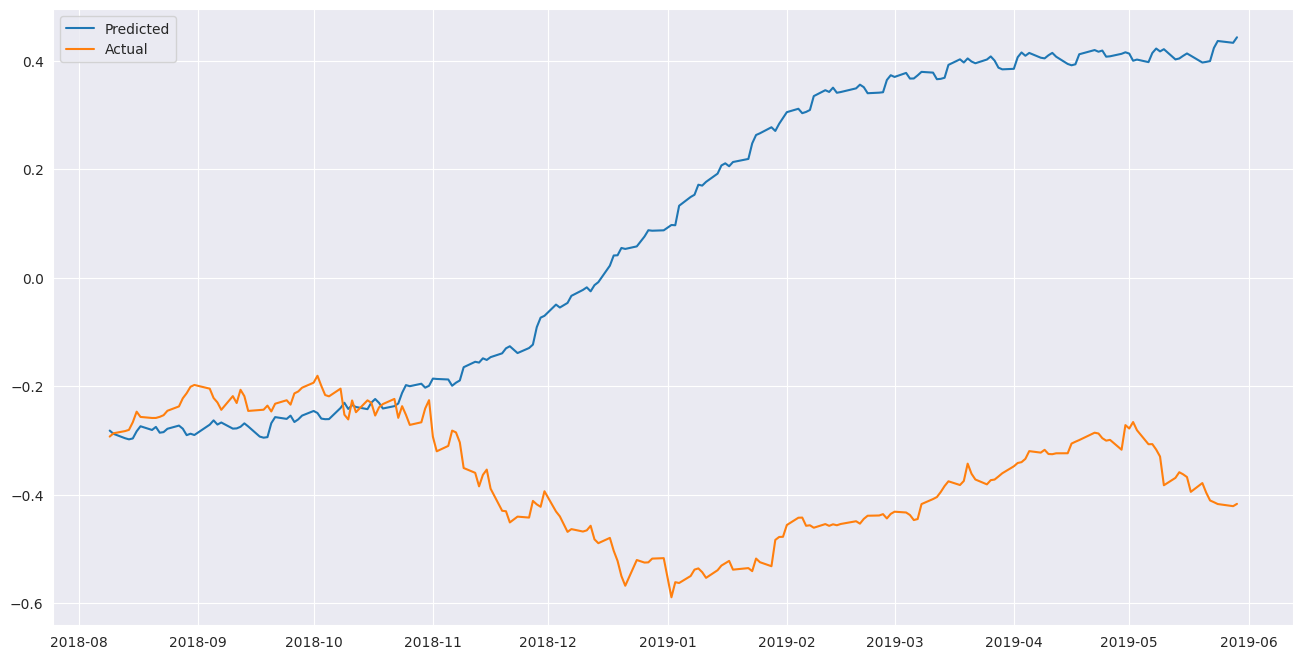

Mean Absolute Percentage Error:  1.1817719393521422


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.084912
         Iterations: 6
         Function evaluations: 1477


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


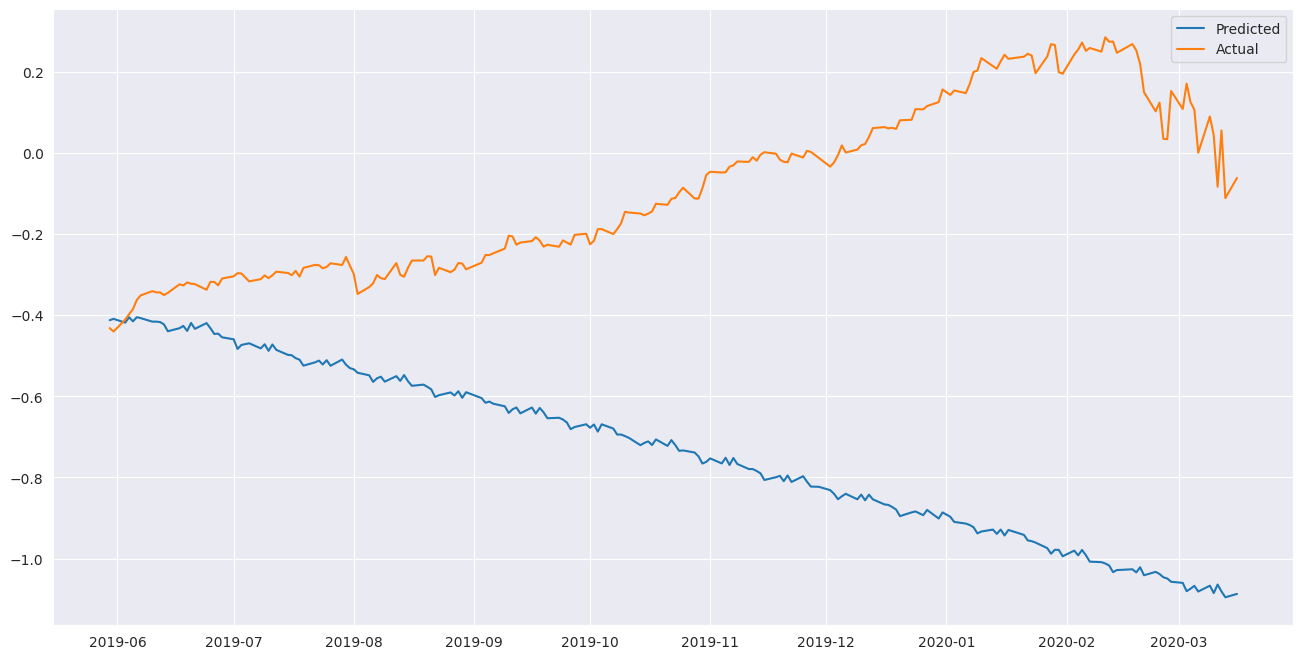

Mean Absolute Percentage Error:  37.34607840697498


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.847647
         Iterations: 6
         Function evaluations: 1469


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


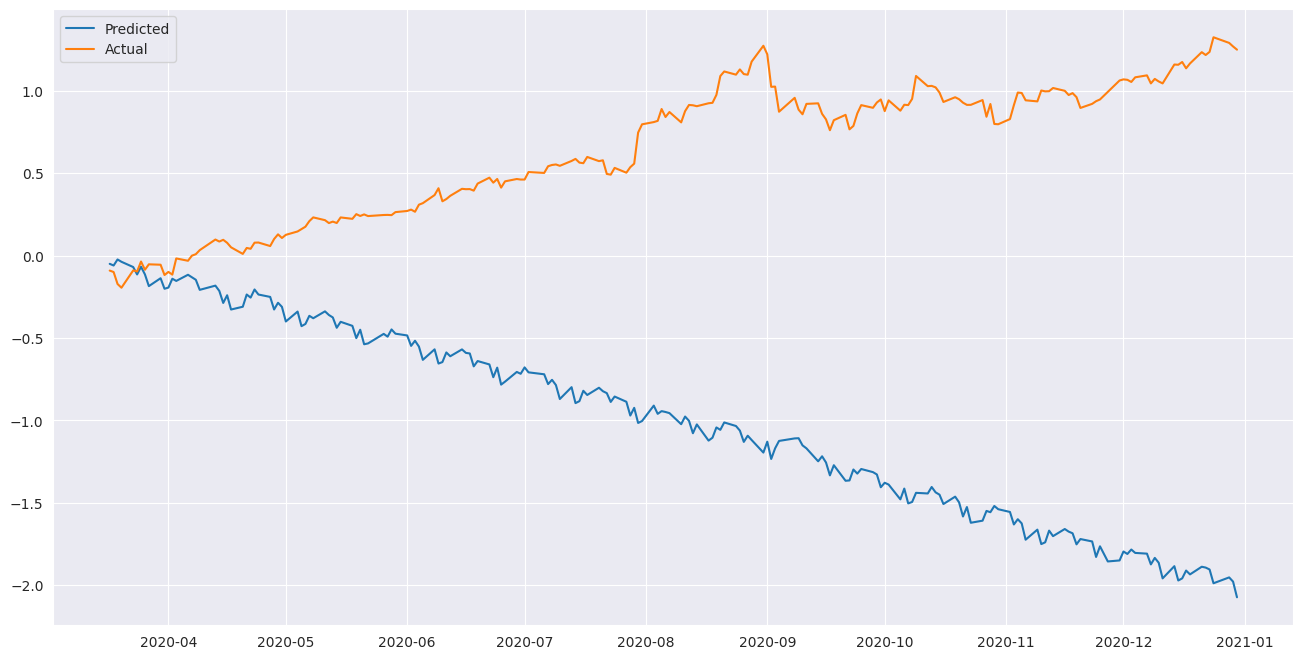

Mean Absolute Percentage Error:  10.5638029499469
Average Mean Absolute Percentage Error:  9.947283450379183


In [116]:
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

##using tema_100

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_samples = len(train_X_with_tema_100)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)
tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)

train_X_with_tema_100 = train_X_with_tema_100.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(5, 1, figsize=(16, 15), sharex=True)
fold = 0
the_average_mape = 0

for train_index, test_index in tscv.split(train_X_with_tema_100):
    X_train, X_test = train_X_with_tema_100.iloc[train_index], train_X_with_tema_100.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    X_train["close"].plot(ax=ax[fold], label='Training Set', title='Fold {}'.format(fold + 1))
    X_test["close"].plot(ax=ax[fold], label='Test Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

for train_index, test_index in tscv.split(train_X_with_tema_100):
    X_train, X_test = train_X_with_tema_100.iloc[train_index], train_X_with_tema_100.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_invertibility=True,
                    enforce_stationarity=True)

    model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
    y_pred = model_fit.predict(start=test_index[0], end=test_index[-1], exog=X_test)

    ##plot the predicted and actual values from y_pred and x_test
    y_pred.reset_index(drop=True, inplace=True)
    y_pred.index = X_test.index

    plt.figure(figsize=(16, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.legend(loc='best')
    plt.show()

    mape = mean_absolute_percentage_error(y_test, y_pred)
    the_average_mape = the_average_mape + mape
    print("Mean Absolute Percentage Error: ", mape)

print("Average Mean Absolute Percentage Error: ", the_average_mape / 5)

In [117]:
#Predicting the values in the validation data using the SARIMAX model
model = SARIMAX(endog=train_Y, exog=train_X_with_tema_100, order=order, seasonal_order=seasonal_order,
                enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
print(model_fit.summary())

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.374022
         Iterations: 7
         Function evaluations: 1669
                                     SARIMAX Results                                      
Dep. Variable:                          Next date   No. Observations:                 2014
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4781.281
Date:                            Wed, 12 Jul 2023   AIC                          -9506.562
Time:                                    16:48:04   BIC                          -9350.075
Sample:                                         0   HQIC                         -9449.068
                                           - 2014                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [118]:
#Predicting the values in the validation data using the SARIMAX model
df_for_validation_with_tema_100 = df_for_validation.drop(['tema_2', 'tema_8'], axis=1)
forecast = model_fit.forecast(steps=len(df_for_validation_with_tema_100), exog=df_for_validation_with_tema_100)

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='date'>

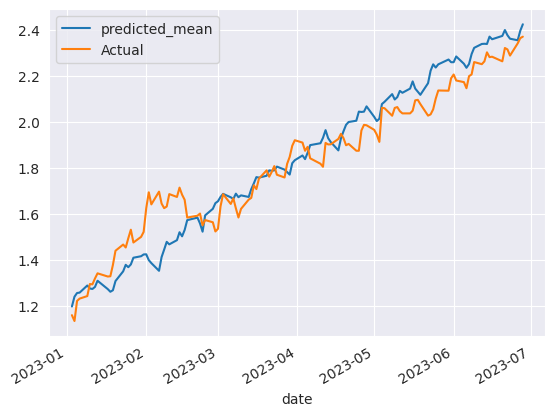

In [119]:
#Plotting the forecasted values

forecast_apple = pd.DataFrame(forecast)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index = df_for_validation_actual.index
forecast_apple["Actual"] = df_for_validation_actual
forecast_apple.rename(columns={0: "predicted_close"}, inplace=True)
forecast_apple["predicted_mean"].plot(legend=True)
forecast_apple["Actual"].plot(legend=True)

In [120]:
from statsmodels.tools.eval_measures import rmse

error = rmse(forecast_apple["predicted_mean"], forecast_apple["Actual"])
error

0.10170528577084818

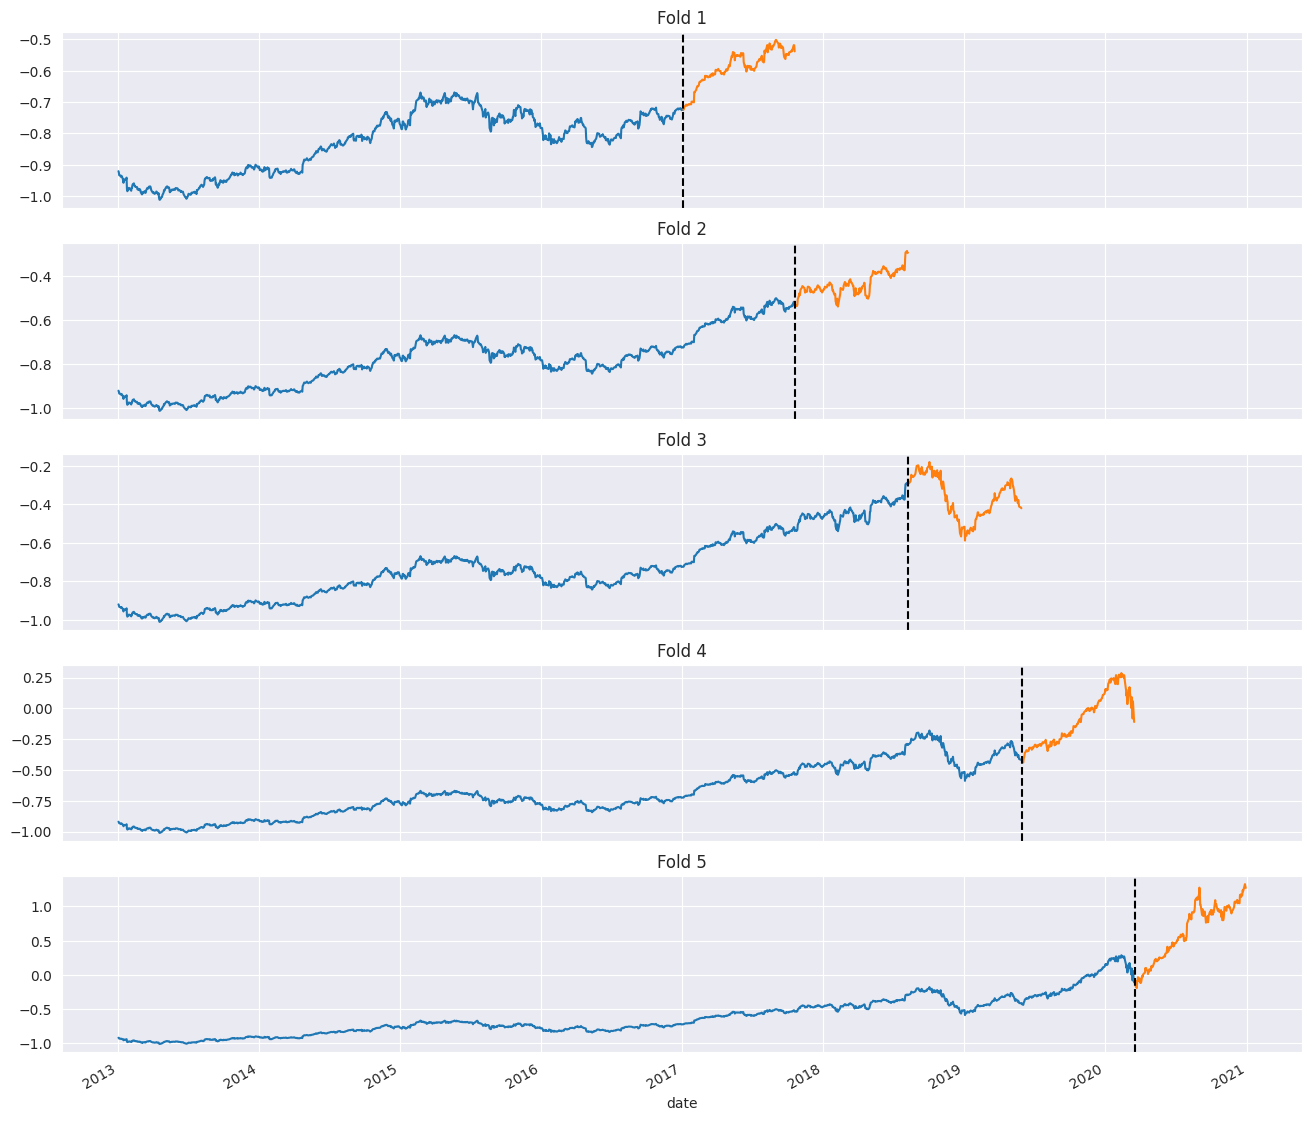

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.444017
         Iterations: 6
         Function evaluations: 1492


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


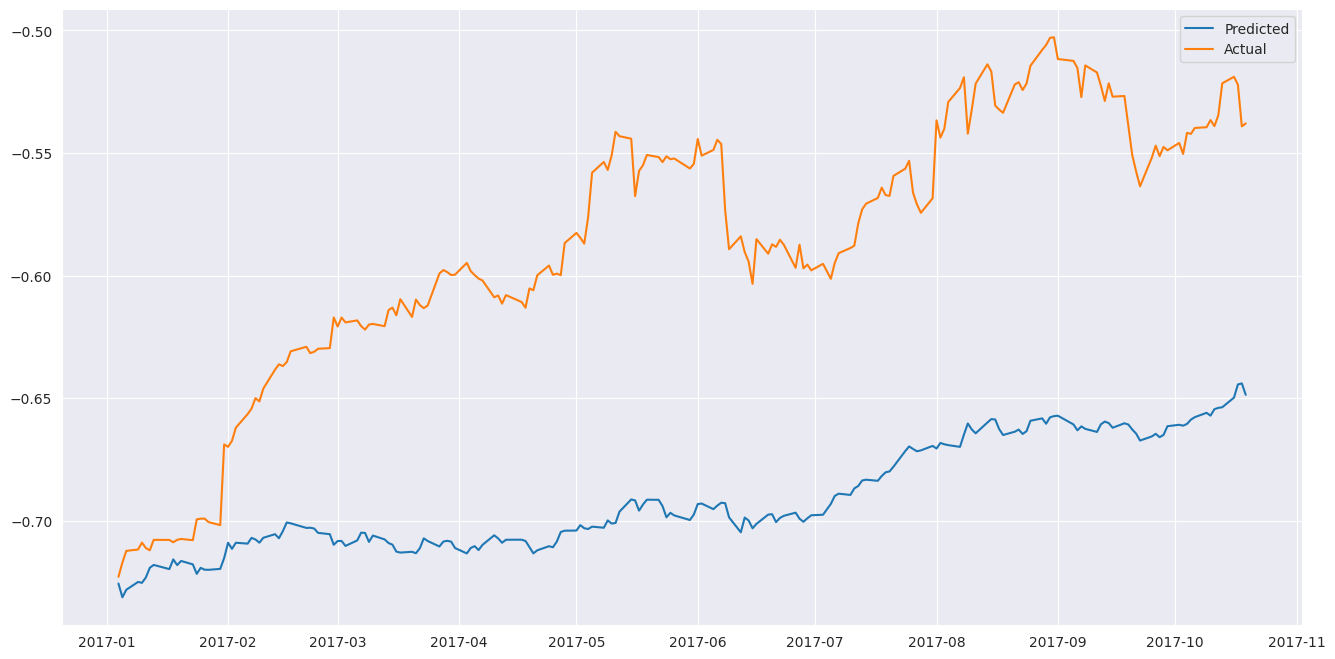

Mean Absolute Percentage Error:  0.1843438209720121


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.427282
         Iterations: 6
         Function evaluations: 1454


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


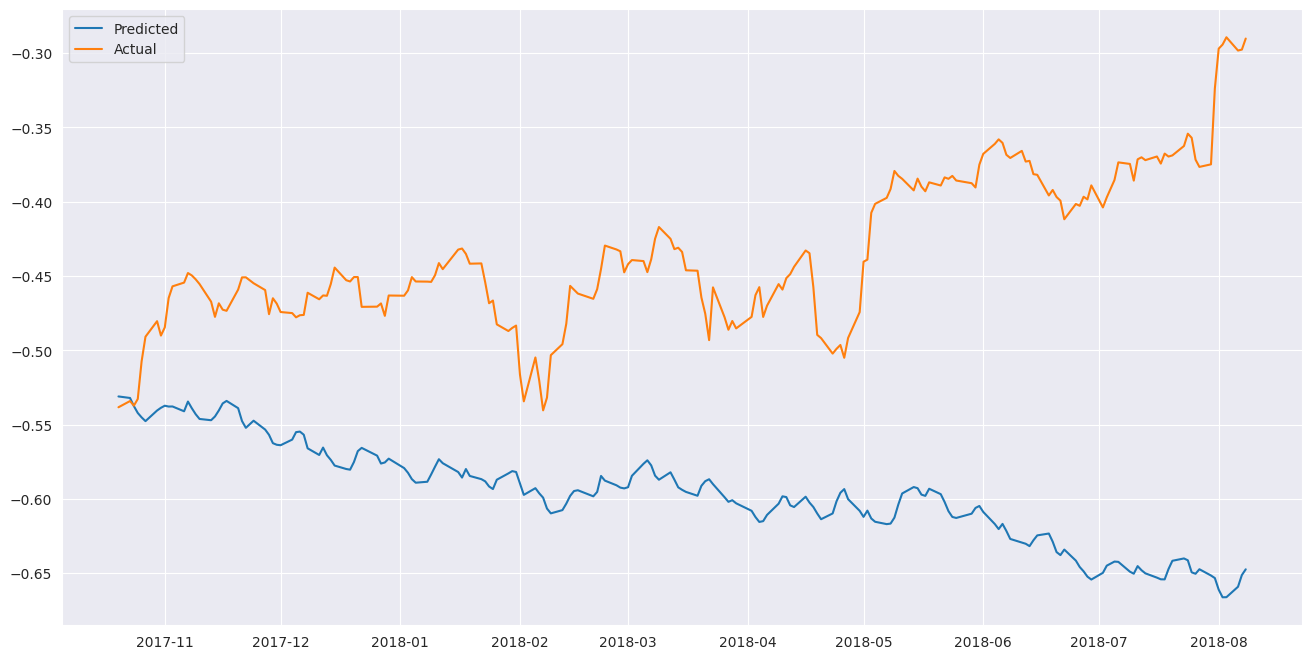

Mean Absolute Percentage Error:  0.4009690915861339


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.327085
         Iterations: 4
         Function evaluations: 985


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


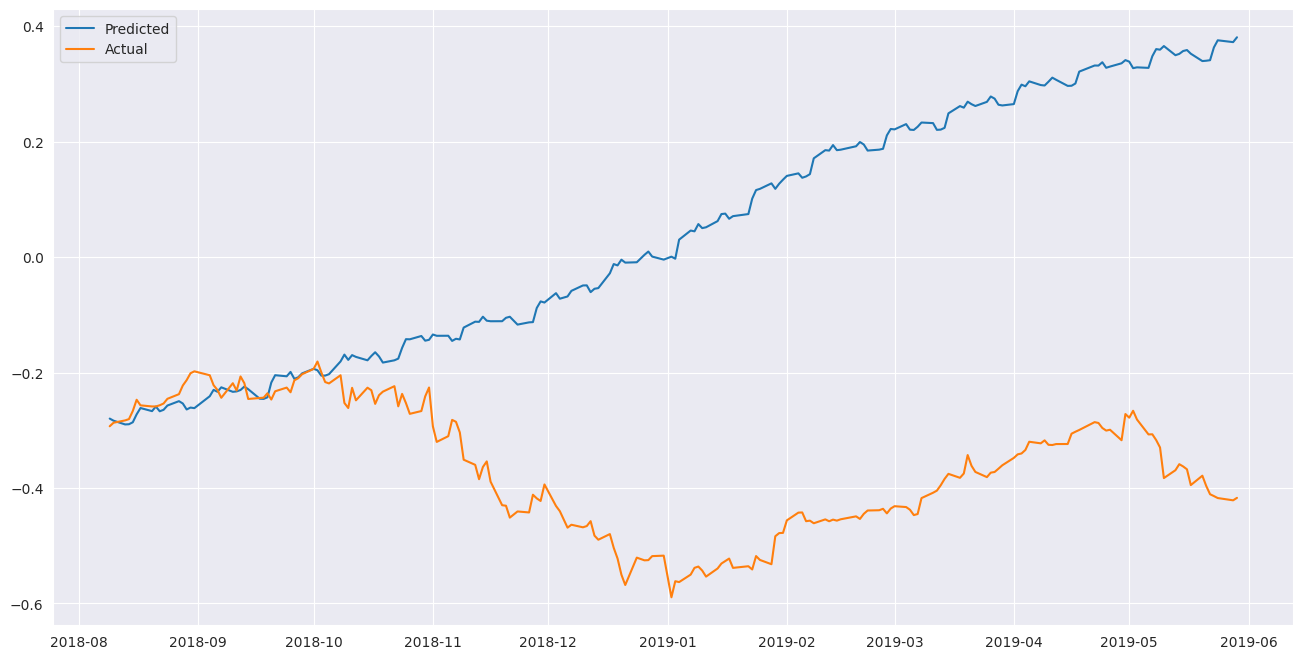

Mean Absolute Percentage Error:  1.0307106766940808


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -3.085167
         Iterations: 4
         Function evaluations: 962


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


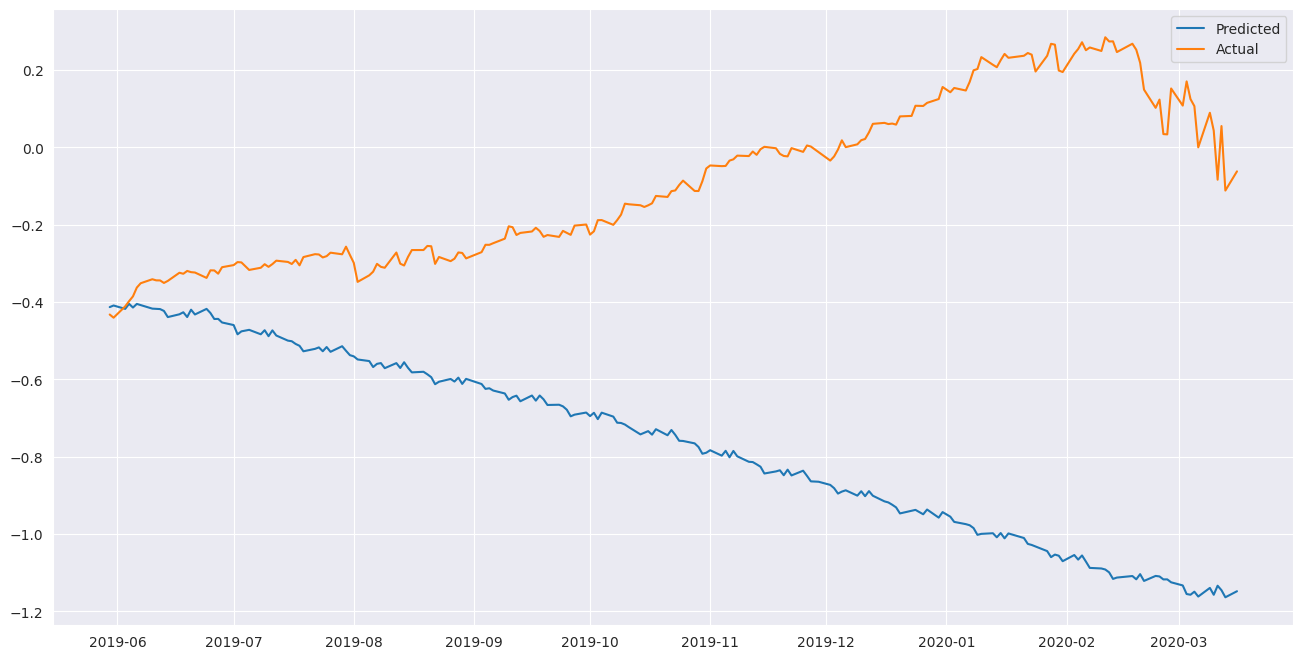

Mean Absolute Percentage Error:  39.55650495741772


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.846408
         Iterations: 6
         Function evaluations: 1426


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


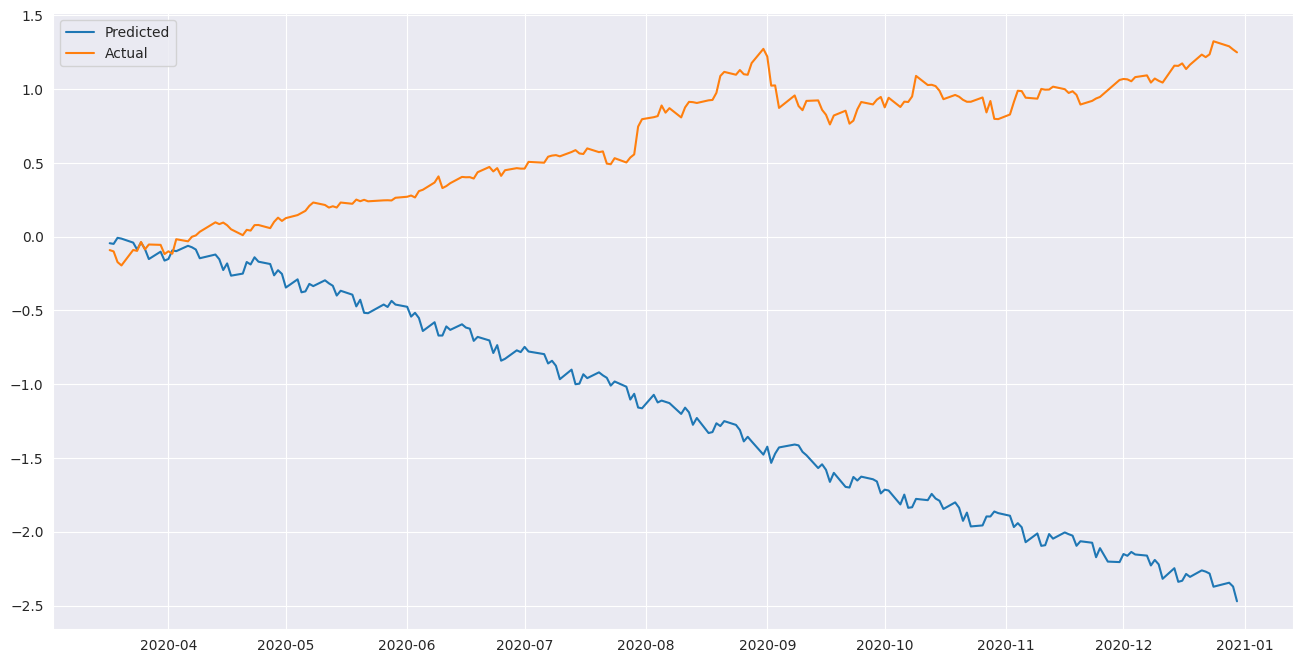

Mean Absolute Percentage Error:  7.047645305036175
Average Mean Absolute Percentage Error:  9.644034770341225


In [121]:
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

##without tema

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_samples = len(train_X_without_tema)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)
tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)

train_X_with_tema_100 = train_X_with_tema_100.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(5, 1, figsize=(16, 15), sharex=True)
fold = 0
the_average_mape = 0

for train_index, test_index in tscv.split(train_X_without_tema):
    X_train, X_test = train_X_without_tema.iloc[train_index], train_X_without_tema.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    X_train["close"].plot(ax=ax[fold], label='Training Set', title='Fold {}'.format(fold + 1))
    X_test["close"].plot(ax=ax[fold], label='Test Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

for train_index, test_index in tscv.split(train_X_without_tema):
    X_train, X_test = train_X_without_tema.iloc[train_index], train_X_without_tema.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_invertibility=True,
                    enforce_stationarity=True)

    model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
    y_pred = model_fit.predict(start=test_index[0], end=test_index[-1], exog=X_test)

    ##plot the predicted and actual values from y_pred and x_test
    y_pred.reset_index(drop=True, inplace=True)
    y_pred.index = X_test.index

    plt.figure(figsize=(16, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.legend(loc='best')
    plt.show()

    mape = mean_absolute_percentage_error(y_test, y_pred)
    the_average_mape = the_average_mape + mape
    print("Mean Absolute Percentage Error: ", mape)

print("Average Mean Absolute Percentage Error: ", the_average_mape / 5)

In [122]:
#Predicting the values in the validation data using the SARIMAX model
model = SARIMAX(endog=train_Y, exog=train_X_without_tema, order=order, seasonal_order=seasonal_order,
                enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
print(model_fit.summary())

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.373471
         Iterations: 6
         Function evaluations: 1402
                                     SARIMAX Results                                      
Dep. Variable:                          Next date   No. Observations:                 2014
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4780.170
Date:                            Wed, 12 Jul 2023   AIC                          -9506.339
Time:                                    17:19:44   BIC                          -9355.441
Sample:                                         0   HQIC                         -9450.899
                                           - 2014                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [123]:
#Predicting the values in the validation data using the SARIMAX model
df_for_validation_without_tema = df_for_validation.drop(['tema_2', 'tema_8', 'tema_100'], axis=1)
forecast = model_fit.forecast(steps=len(df_for_validation_without_tema), exog=df_for_validation_without_tema)

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='date'>

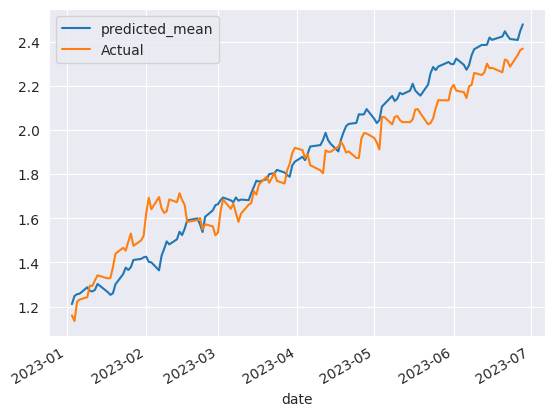

In [124]:
#Plotting the forecasted values

forecast_apple = pd.DataFrame(forecast)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index = df_for_validation_actual.index
forecast_apple["Actual"] = df_for_validation_actual
forecast_apple.rename(columns={0: "predicted_close"}, inplace=True)
forecast_apple["predicted_mean"].plot(legend=True)
forecast_apple["Actual"].plot(legend=True)

In [125]:
from statsmodels.tools.eval_measures import rmse

error = rmse(forecast_apple["predicted_mean"], forecast_apple["Actual"])
error

0.11514034922928976